In [1]:
import numpy as np
import matplotlib.pyplot as plt
from analysis.analysis import Txt_Reading
import pandas as pd
import os
from tqdm.notebook import tqdm as tqdm

%matplotlib inline

In [2]:
folder = "0nM"
f_MAX = [10, 15, 20, 25, 30, 35]
f_max = 10
reading = Txt_Reading(folder, f_max)

100%|██████████| 12/12 [00:00<00:00, 1862.76it/s]

All trajectories have already been categorized


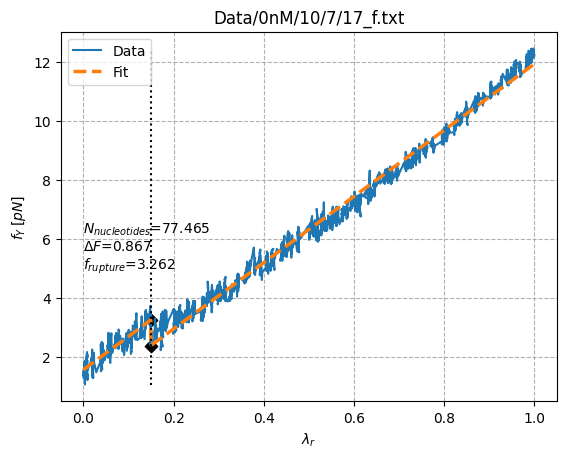

f_rupture  f_rupture_next    x_ssDNA  N_nucleotides     k_eff      t_0  \
0   3.261992        2.394849  20.711791      77.464635  0.043801  2.44043   

        λ_0      a_pre     b_pre     a_post    b_post  N_fits  
0  0.149301  11.283812  1.577313  11.210209  0.721158       2

In [3]:
file = reading.readTxt(number=7, N=17, ty='f', forced_reshaped=0, graph=True) # 10 reshape works best
reading.params_df

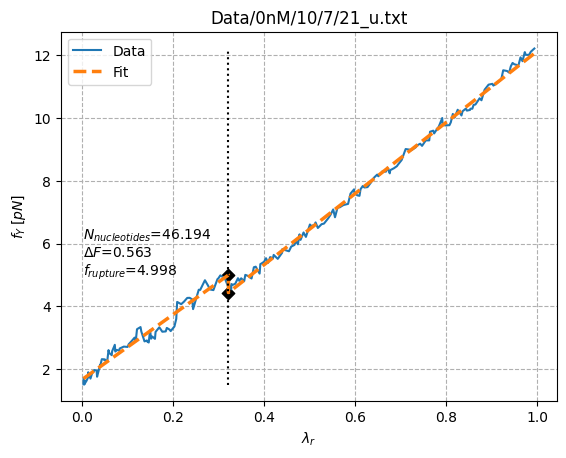

f_rupture  f_rupture_next    x_ssDNA  N_nucleotides     k_eff      t_0  \
0     4.9983        4.435769  15.158848      46.193757  0.040325  0.07617   

        λ_0      a_pre     b_pre     a_post    b_post  N_fits  
0  0.322166  10.380654  1.654002  11.355327  0.777465       2

In [4]:
file = reading.readTxt(number=7, N=21, ty='u', forced_reshaped=0, graph=True) # 10 reshape works best
reading.params_df

In [5]:
reading.new_method.fitting_points, reading.fitting_points

(5, 5)

In [6]:
# reading.choice(np.array(reading.best).flatten()), reading.linear, reading.best

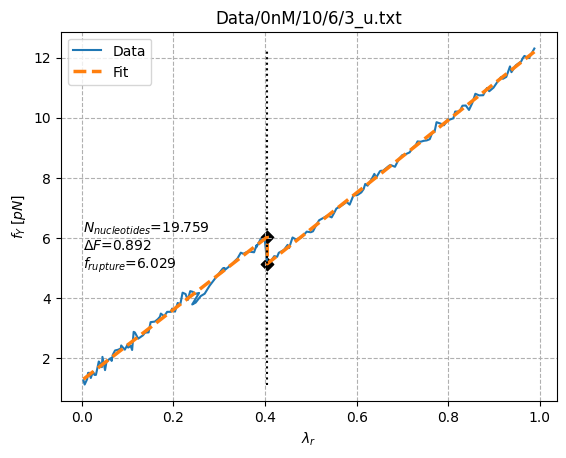

f_rupture  f_rupture_next    x_ssDNA  N_nucleotides     k_eff      t_0  \
0   6.028668        5.136894  22.433718       19.75851  0.042256  0.07227   

        λ_0      a_pre    b_pre     a_post    b_post  N_fits  
0  0.404892  11.795133  1.25291  12.100558  0.237472       2

In [7]:
file = reading.readTxt(number=6, N=3, ty='u', forced_reshaped=0, graph=True) # Reshape = 20 works better, but N is then worse
reading.params_df

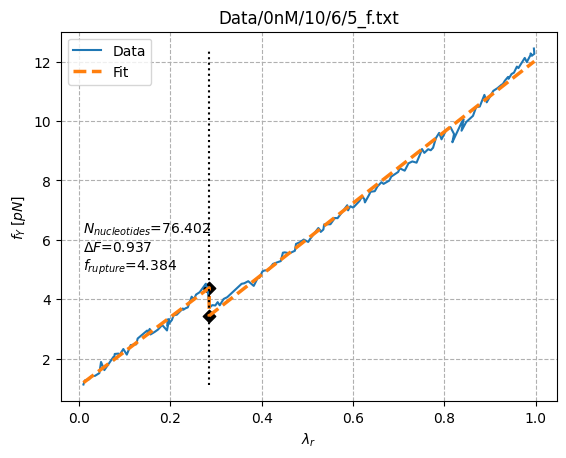

f_rupture  f_rupture_next    x_ssDNA  N_nucleotides     k_eff      t_0  \
0   4.384029        3.446709  23.698815      76.402434  0.041512  3.17187   

        λ_0      a_pre     b_pre     a_post   b_post  N_fits  
0  0.284785  11.578248  1.086718  12.018647  0.02398       2

In [8]:
file = reading.readTxt(number=6, N=5, ty='f', graph=True)
reading.params_df

In [9]:
# plt.plot(reading.λ[:600], reading.force_Y[:600])
# plt.scatter(reading.λ_0, reading.f_rupture, marker="^", c="red")
# plt.scatter(reading.λ[(reading.index+1)[0]], reading.f_rupture_next, marker="v", c="orange", s=1000);

In [10]:
reading.bootstrap(reading.λ, reading.force_Y, reading.time, *reading.find_jumps(reading.force_Y))

(44, np.float64(41.61991416215329), 20.817022546490403)

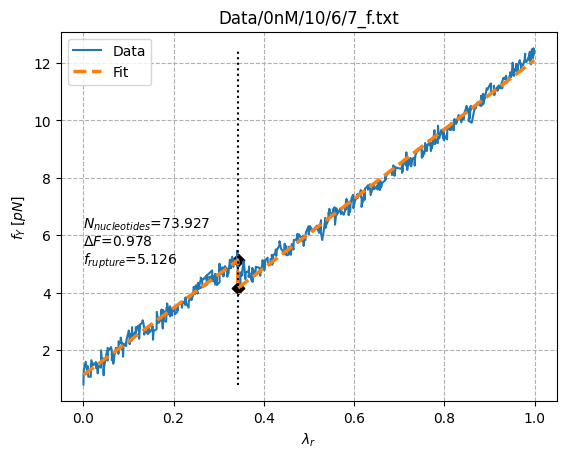

f_rupture  f_rupture_next    x_ssDNA  N_nucleotides     k_eff     t_0  \
0   5.125927        4.148239  24.508352      73.927231  0.041992  3.3164   

        λ_0      a_pre     b_pre     a_post    b_post  N_fits  
0  0.342431  11.696862  1.120556  12.102698  0.003896       2

In [11]:
file = reading.readTxt(number=6, N=7, ty='f', forced_reshaped=0, graph=True)
reading.params_df

In [12]:
# Columns: CycleCount, X_force,	Y_force, Z_force, time(sec), Status, λ

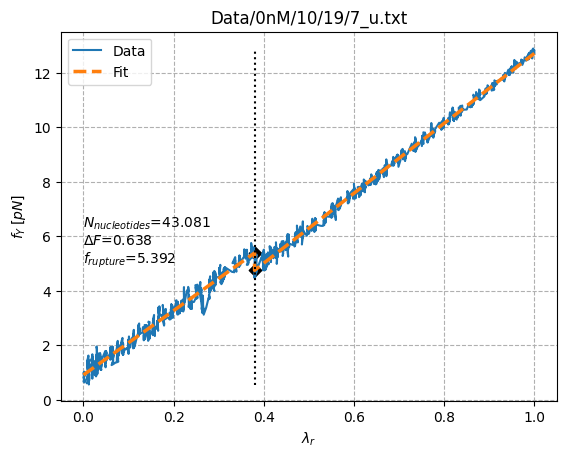

f_rupture  f_rupture_next    x_ssDNA  N_nucleotides    k_eff      t_0  \
0   5.392222        4.754405  14.568933      43.081117  0.04792  1.04571   

        λ_0      a_pre     b_pre     a_post   b_post  N_fits  
0  0.379508  11.789948  0.917848  12.821285 -0.11137       2

In [32]:
file = reading.readTxt(number=19, N=7, ty='u', forced_reshaped=0, graph=True) # 10 reshape works best
reading.params_df

In [33]:
from scipy.signal import savgol_filter
F_smooth = savgol_filter(reading.force_Y, window_length=11, polyorder=2)
λ_smooth = savgol_filter(reading.λ, window_length=11, polyorder=2)
dF = np.diff(F_smooth)# /np.diff(savgol_filter(reading.λ, window_length=11, polyorder=2))  # ∼ ΔF tra campioni

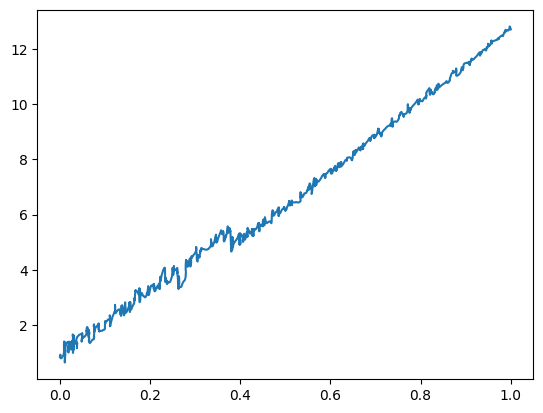

In [34]:
plt.plot(savgol_filter(reading.λ, window_length=11, polyorder=2), F_smooth, label='Smoothed Force and Lambda')

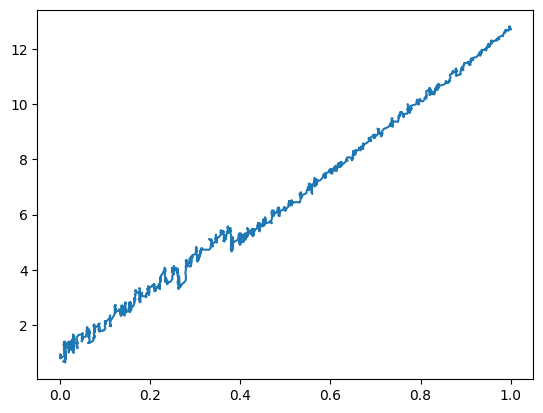

In [35]:
plt.plot(reading.λ, F_smooth, label='Smoothed Force')

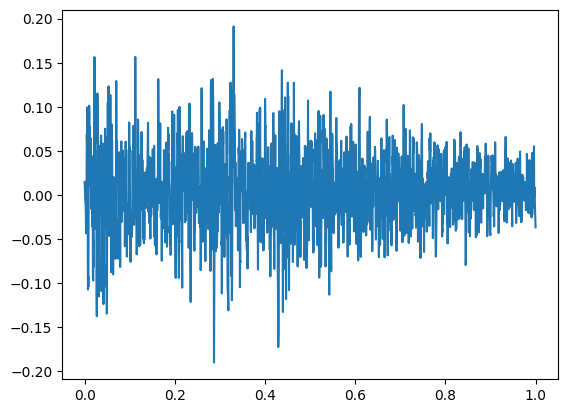

In [36]:
plt.plot(np.linspace(0, 1, len(dF)), dF, label='ΔF between samples')

In [37]:
from scipy.signal import find_peaks
find_peaks(-dF, height=0.1, distance=10)

(array([  17,   62,   72,   86,   96,  113,  497,  540,  659,  699,  732,
         750,  791,  986, 1010, 1026, 1041, 1246]),
 {'peak_heights': array([0.10736667, 0.13767483, 0.11512587, 0.10913706, 0.12388042,
         0.13473403, 0.10522587, 0.12145734, 0.19012517, 0.11180746,
         0.13098648, 0.11955851, 0.10478998, 0.17267459, 0.13284452,
         0.11811772, 0.10802075, 0.11323683])})

New: [0.01237252 0.01300719 0.01986074 0.02383703 0.02683399 0.03130147
 0.0294314  0.02989902 0.15695121 0.17764009 0.23230183 0.2497576
 0.26319766 0.26353827 0.28860237 0.37828723 0.38265921 0.3985028
 0.39979104 0.48374599] [1.1515 0.9394 1.1633 1.2576 1.4394 1.5656 1.5404 1.4646 2.712  3.318
 4.1462 3.929  3.6075 3.4998 4.3633 5.5063 5.2471 5.237  5.4525 6.0921]
Old: 0.3795075988743794 [np.float64(5.39222238367884)]


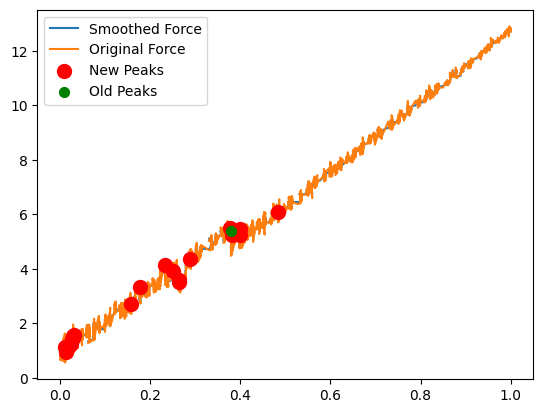

In [38]:
print("New:", reading.λ[find_peaks(-dF, height=1e-1)[0]-1], reading.force_Y[find_peaks(-dF, height=1e-1)[0]-1])
print("Old:", reading.λ_0, reading.f_rupture)
plt.plot(reading.λ, F_smooth, label='Smoothed Force')
plt.plot(reading.λ, reading.force_Y, label='Original Force')
plt.scatter(reading.λ[find_peaks(-dF, height=1e-1)[0]-1], reading.force_Y[find_peaks(-dF, height=1e-1)[0]-1], 
            marker="o", c="red", s=100, label='New Peaks', zorder=2)
plt.scatter(reading.λ_0, reading.f_rupture, zorder=2,
            marker="o", c="green", s=50, label='Old Peaks')
plt.legend()
plt.show()

Peak: 497. Peak at λ: 0.16 with force: 2.69.          Delta F: 0.18, Chi: 4.50. Delta F * Chi: 0.814668654086243.
Peak: 540. Peak at λ: 0.18 with force: 2.97.          Delta F: 0.30, Chi: 1.99. Delta F * Chi: 0.605458036359193.
Peak: 659. Peak at λ: 0.23 with force: 3.98.          Delta F: 0.41, Chi: 14.41. Delta F * Chi: 5.913512344540853.
Peak: 699. Peak at λ: 0.25 with force: 4.13.          Delta F: 0.14, Chi: 3.20. Delta F * Chi: 0.43425216914399195.
Peak: 732. Peak at λ: 0.26 with force: 3.66.          Delta F: 0.47, Chi: 1.60. Delta F * Chi: 0.7542216655308159.
Peak: 750. Peak at λ: 0.26 with force: 3.79.          Delta F: 0.16, Chi: 6.91. Delta F * Chi: 1.1321395645549983.
Peak: 791. Peak at λ: 0.29 with force: 4.20.          Delta F: 0.16, Chi: 8.59. Delta F * Chi: 1.407722357425675.
Peak: 986. Peak at λ: 0.38 with force: 5.40.          Delta F: 0.40, Chi: 1.16. Delta F * Chi: 0.4713852532197501.
Best state:
{'chi': np.float64(1.602), 'popt_pre': array([11.6695573 ,  0.93642103

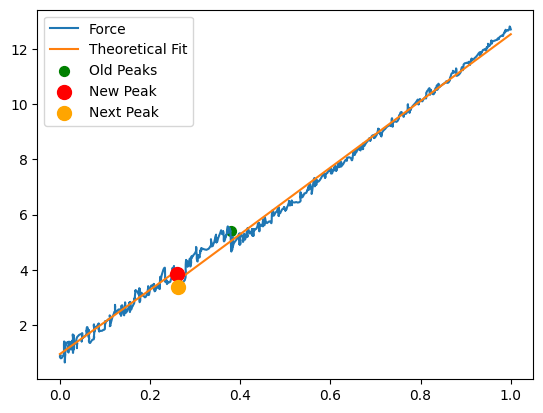

In [45]:
fitting_points = 15
best_chi = np.inf
best_delta_F = 0
res = {}
all_chi, all_deltaF = [], []
for peak in find_peaks(-dF, height=1e-1)[0]:
    if peak < 300 or peak > 1000:
        continue
    fitting_points = min(fitting_points, peak, len(λ_smooth)-peak-1)
    λ = λ_smooth[peak-fitting_points:peak+fitting_points]
    f_Y = F_smooth[peak-fitting_points:peak+fitting_points]
    popt_pre, popt_post = reading.new_method.fit(λ, f_Y, fitting_points)
    x = np.concatenate((np.linspace(min(λ_smooth), λ_smooth[peak], peak),
                        np.linspace(λ_smooth[peak], max(λ_smooth), len(λ_smooth)-peak)))
    theor_fit = reading.new_method._heaviside_fitting(x, peak, *popt_pre, *popt_post)
    chi = reading.new_method.chi_squared(f_Y, theor_fit[peak-fitting_points:peak+fitting_points], fitting_points)
    f_rupture = [theor_fit[peak-1]]
    f_rupture_next = [theor_fit[peak]]
    delta_F = f_rupture[0] - f_rupture_next[0]    
    print(f"Peak: {peak}. Peak at λ: {reading.λ[peak]:.2f} with force: {reading.force_Y[peak]:.2f}.\
          Delta F: {delta_F:.2f}, Chi: {chi:.2f}. Delta F * Chi: {delta_F*chi}.")

    all_chi.append(chi)
    all_deltaF.append(delta_F)
    
    if delta_F > best_delta_F:
        res['chi'] = chi
        best_popt_pre, best_popt_post = reading.new_method.fit(λ_smooth, F_smooth, peak)
        res['popt_pre'] = best_popt_pre
        res['popt_post'] = best_popt_post
        res['f_rupture'] = f_rupture
        res['f_rupture_next'] = f_rupture_next
        res['peak'] = peak
        res['delta_F'] = delta_F
        res['f_Y'] = f_Y
        res['theor_fit'] = reading.new_method._heaviside_fitting(x, peak, *best_popt_pre, *best_popt_post)
        res['x'] = x
        res['λ'] = λ
        res['best_peak'] = peak
        best_chi = chi
        best_delta_F = delta_F

print(f"Best state:\n{res}")
print(f"Old best state:\n{reading.λ_0} {np.where(reading.λ_0==reading.λ)[0]}; New best state: {reading.λ[res['peak']]} [{res['peak']}]")
plt.plot(λ_smooth, F_smooth, label='Force')
plt.plot(res['x'], res['theor_fit'], label='Theoretical Fit')
plt.scatter(reading.λ_0, reading.f_rupture, marker="o", c="green", s=50, label='Old Peaks')
plt.scatter(reading.λ[res['peak']], res['f_rupture'], marker="o", c="red", s=100, label='New Peak', zorder=2)
plt.scatter(reading.λ[res['peak']+1], res['f_rupture_next'], marker="o", c="orange", s=100, label='Next Peak', zorder=2)
plt.legend()
plt.show()

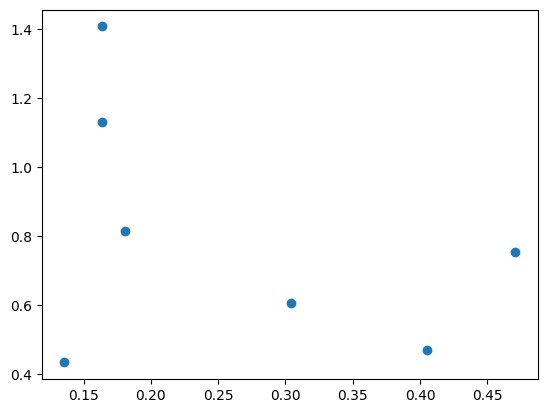

In [21]:
to_plot = np.array(all_deltaF)*np.array(all_chi)
plt.plot(np.array(all_deltaF)[to_plot < 1.5], to_plot[to_plot < 1.5], 'o')

In [22]:
reading.k_eff

np.float64(0.047920159040636755)

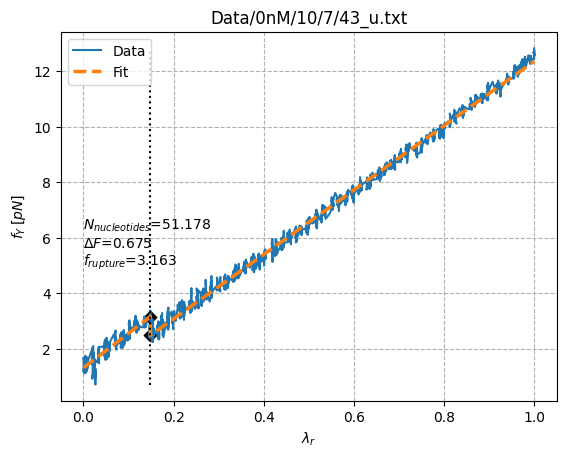

f_rupture  f_rupture_next   x_ssDNA  N_nucleotides     k_eff      t_0  \
0   3.162618        2.487645  13.44847      51.177676  0.053762  0.50098   

        λ_0      a_pre     b_pre     a_post    b_post  N_fits  
0  0.148398  12.417345  1.319911  11.601233  0.766047       2

In [23]:
file = reading.readTxt(number=7, N=43, ty='u', forced_reshaped=0, graph=True) # 10 reshape works best
reading.params_df

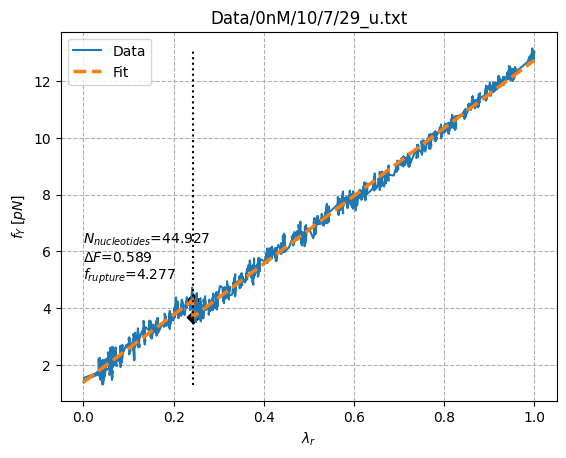

f_rupture  f_rupture_next    x_ssDNA  N_nucleotides     k_eff      t_0  \
0    4.27728        3.688685  13.780011      44.926863  0.046428  0.69238   

        λ_0      a_pre     b_pre     a_post    b_post  N_fits  
0  0.242902  11.875804  1.392627  11.943895  0.787493       2

In [24]:
file = reading.readTxt(number=7, N=29, ty='u', forced_reshaped=0, graph=True) # 10 reshape works best
reading.params_df

In [25]:
from scipy.signal import savgol_filter

In [26]:
F_smooth = savgol_filter(reading.force_Y, window_length=11, polyorder=2)
λ_smooth = savgol_filter(reading.λ, window_length=11, polyorder=2)
dF = np.diff(F_smooth)

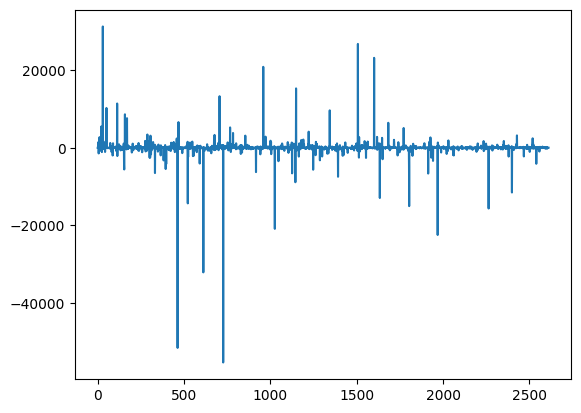

In [27]:
plt.plot(dF/np.diff(λ_smooth), label='ΔF between samples')

In [15]:
reading.new_method.best_chi

1.054

In [16]:
# molecules, all_molecules_f, all_molecules_u = reading.seq_analysis_post_meta()
res = np.load(f'res/{folder}/f_max{f_max}.npz', allow_pickle=True)
molecules = res['molecules']
all_molecules_u = res['all_molecules_u']
all_molecules_f = res['all_molecules_f']

self.params = self.f_rupture + self.f_rupture_next + self.x_ssDNA + self.N_nucleotides + self.t_0 + self.λ_0 + self.popt_pre + self.popt_post + [self.N_fits]

This should be changed to a python dictionary or something else

In [17]:
keys = ['f_rupture', 'f_rupture_next', 'x_ssDNA', 'N', 'k_eff', 't_0', 'fileName']
# Create a dictionary with the data
data = {}
for ii, molecule in enumerate(molecules):
    U_dict = {}
    F_dict = {}
    
    for jj, el in enumerate(all_molecules_u[ii]):
        U_dict[jj+1] = dict(zip(keys, el[0]))
    
    for jj, el in enumerate(all_molecules_f[ii]):
        F_dict[jj+1] = dict(zip(keys, el[0]))
    
    data[molecule] = {'U': U_dict, 'F': F_dict}

In [18]:
data[molecules[-1]]['U']#['N']

{1: {'f_rupture': 6.28495146054582,
  'f_rupture_next': 5.4545698673191865,
  'x_ssDNA': 15.477684767958376,
  'N': 12.633154935938798,
  'k_eff': 0.05879729458674978,
  't_0': 49.81055000000015,
  'fileName': 'Data/0nM/10/22/3_u.txt'},
 2: {'f_rupture': 6.310319950474152,
  'f_rupture_next': 5.431396518632822,
  'x_ssDNA': 16.151221830921067,
  'N': 13.102520757922264,
  'k_eff': 0.059411165498432894,
  't_0': 54.875,
  'fileName': 'Data/0nM/10/22/4_u.txt'},
 3: {'f_rupture': 6.322431480810415,
  'f_rupture_next': 5.409430883913562,
  'x_ssDNA': 16.74302382076617,
  'N': 13.543728932119382,
  'k_eff': 0.05934523107144486,
  't_0': 59.93848000000071,
  'fileName': 'Data/0nM/10/22/5_u.txt'},
 4: {'f_rupture': 4.8918549097782345,
  'f_rupture_next': 4.229089823672494,
  'x_ssDNA': 12.862969088585995,
  'N': 39.54641857840792,
  'k_eff': 0.05679894997514304,
  't_0': 64.99219000000085,
  'fileName': 'Data/0nM/10/22/6_u.txt'},
 5: {'f_rupture': 4.983792440704254,
  'f_rupture_next': 4.1709

In [19]:
metaFile = np.loadtxt(f'meta/0nM/{f_max}/jumps.txt', dtype=str)

In [20]:
N_U = {
    molecule: {
        key: value['N'] for key, value in data[molecule]['U'].items() if value['fileName'] in metaFile
        } 
    for molecule in molecules}
N_F = {
    molecule: {
        key: value['N'] for key, value in data[molecule]['F'].items() if value['fileName'] in metaFile
        } 
    for molecule in molecules}

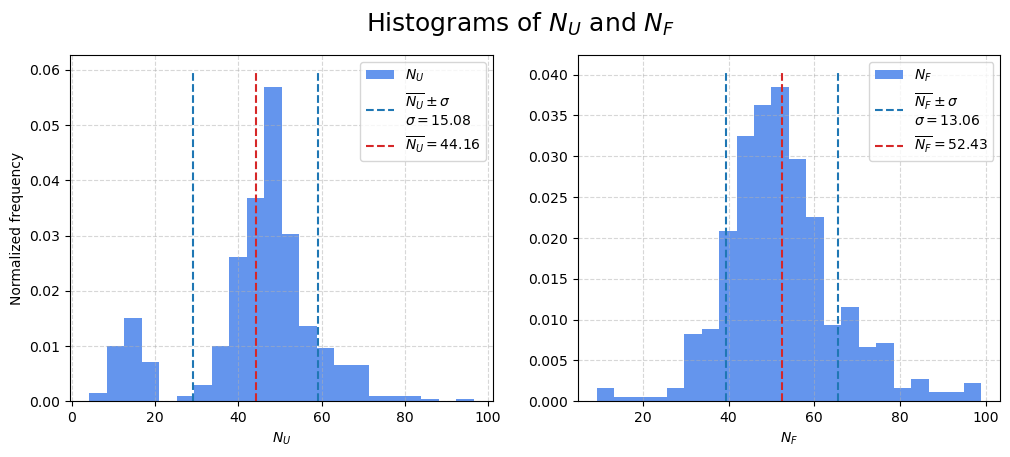

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))
to_plot = [
    np.array([value['N'] for molecule in molecules for _, value in data[molecule]['U'].items() if value['fileName'] in metaFile]), 
    np.array([value['N'] for molecule in molecules for _, value in data[molecule]['F'].items() if value['fileName'] in metaFile])
]
labels = ['N_U', 'N_F']
for ii in range(2):
    ax[ii].hist(to_plot[ii], bins=22, density=True,
                color='cornflowerblue', label=fr'${labels[ii]}$')
    y_lim = ax[ii].get_ylim()
    ax[ii].vlines(np.mean(to_plot[ii][to_plot[ii] != 0])+np.std(to_plot[ii][to_plot[ii] != 0]), 
                  *y_lim, color='tab:blue', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}\pm \sigma$'+f'\n'+fr'$\sigma={np.std(to_plot[ii][to_plot[ii] != 0]):.2f}$')
    ax[ii].vlines(np.mean(to_plot[ii][to_plot[ii] != 0])-np.std(to_plot[ii]), 
                  *y_lim, color='tab:blue', ls='--', label=None)
    ax[ii].vlines(np.mean(to_plot[ii][to_plot[ii] != 0]), 
                  *y_lim, color='tab:red', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}=$'+f'{np.mean(to_plot[ii][to_plot[ii] != 0]):.2f}')
    ax[ii].set_xlabel(fr'${labels[ii]}$')
    ax[ii].set_ylabel(r'Normalized frequency') if ii == 0 else None
    ax[ii].grid(ls='--', alpha=0.5)
    ax[ii].legend(loc='best')
plt.suptitle(r'Histograms of $N_U$ and $N_F$', fontsize=18)
plt.show()

### #ToDo:
* Fai instogrammi per ciascuna molecola
* Ricontrolla $N$ e $f_{rip}$
* Analisi manuale delle traiettorie _failed_U_path_ o manda a Maddalena **1nM/20pN**

In [22]:
# Compute the percentage of elements outside the [mean-std, mean+std] confidence interval
failed_U = np.sum((to_plot[0] < np.mean(to_plot[0])-np.std(to_plot[0])) | (to_plot[0] > np.mean(to_plot[0])+np.std(to_plot[0])))/len(to_plot[0]) * 100
failed_F = np.sum((to_plot[1] < np.mean(to_plot[1])-np.std(to_plot[1])) | (to_plot[1] > np.mean(to_plot[1])+np.std(to_plot[1])))/len(to_plot[1]) * 100
print(f'Outliers in U: {failed_U:.2f}%\nOutliers in F: {failed_F:.2f}%')

Outliers in U: 25.58%
Outliers in F: 26.85%


In [23]:
# See an example of the failed_U trajectory
failed_U_dict = {}
failed_F_dict = {}

for mol, sub_dic in data.items():
    failed = []
    for key, values in sub_dic['U'].items():
        if values['N'] < np.mean(
            to_plot[0])-np.std(to_plot[0]) or values['N'] > np.mean(
                to_plot[0])+np.std(to_plot[0]) and values['fileName'] in metaFile: 
            failed.append(values['fileName']) 
    if failed:
        failed_U_dict[mol] = failed

for mol, sub_dic in data.items():
    failed = []
    for key, values in sub_dic['F'].items():
        if values['N'] < np.mean(
            to_plot[1])-np.std(to_plot[1]) or values['N'] > np.mean(
                to_plot[1])+np.std(to_plot[1]) and values['fileName'] in metaFile: 
            failed.append(values['fileName']) 
    if failed:
        failed_F_dict[mol] = failed

In [24]:
number_of_failed_anaylys_U = sum([len(sub_dic) for sub_dic in failed_U_dict.values()])
number_of_failed_anaylys_F = sum([len(sub_dic) for sub_dic in failed_F_dict.values()])

In [25]:
print(f'Percentage of outliers U (looking only at the # of nucleotides): {number_of_failed_anaylys_U/len(to_plot[0]) * 100:.2f}%')
print(f'Percentage of outliers F (looking only at the # of nucleotides): {number_of_failed_anaylys_F/len(to_plot[1]) * 100:.2f}%')

Percentage of outliers U (looking only at the # of nucleotides): 30.44%
Percentage of outliers F (looking only at the # of nucleotides): 34.90%


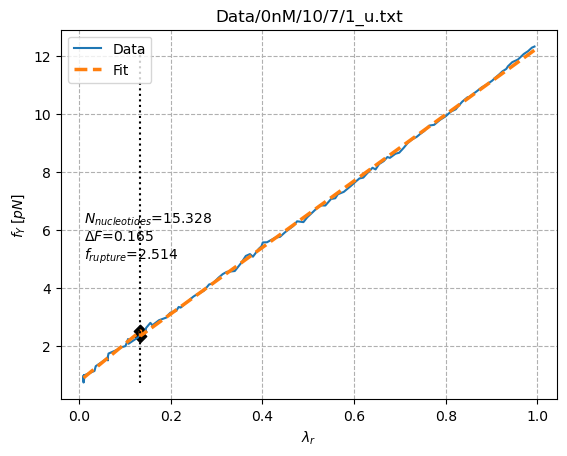

f_rupture  f_rupture_next   x_ssDNA  N_nucleotides     k_eff      t_0  \
0   2.513741        2.349063  3.505306      15.328141  0.059643  0.02636   

       λ_0     a_pre     b_pre     a_post    b_post  N_fits  
0  0.13411  12.96569  0.774917  11.446215  0.814015       2

In [26]:
file = reading.readTxt(number=7, N=1, ty='u', forced_reshaped=0, graph=True) # 10 reshape works best
reading.params_df

In [27]:
mean_N_U = np.mean(to_plot[0][to_plot[0] != 0])
std_N_U = np.std(to_plot[0][to_plot[0] != 0])
mean_N_F = np.mean(to_plot[1][to_plot[1] != 0])
std_N_F = np.std(to_plot[1][to_plot[1] != 0])

# outliers_U = np.where(np.abs(N_U - mean_N_U) > std_N_U)[0]
# outliers_F = np.where(np.abs(N_F - mean_N_F) > std_N_F)[0]

outliers_U = {
    molecule: {
        value['fileName']: value['N'] for value in data[molecule]['U'].values() 
        if (value['N'] > 70 or value['N'] < 30) and value['fileName'] in metaFile
        } for molecule in molecules}
outliers_F = {
    molecule: {
        value['fileName']: value['N'] for value in data[molecule]['F'].values() 
        if (value['N'] > 70 or value['N'] < 30) and value['fileName'] in metaFile
        } for molecule in molecules}

In [28]:
path_re_analyze_U = [traj for molecule in outliers_U.keys() for traj in outliers_U[molecule].keys()]
path_re_analyze_F = [traj for molecule in outliers_F.keys() for traj in outliers_F[molecule].keys()]

In [29]:
len(path_re_analyze_U), len(path_re_analyze_F)

(80, 50)

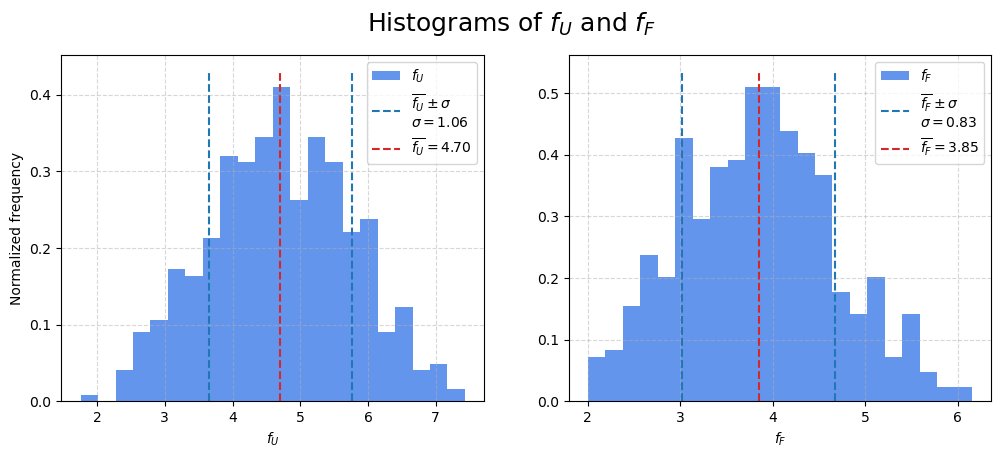

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))
to_plot_f_rupture = [
    np.array([value['f_rupture'] for molecule in molecules 
              for _, value in data[molecule]['U'].items() 
              if value['fileName'] in metaFile]), 
    np.array([value['f_rupture'] for molecule in molecules 
              for _, value in data[molecule]['F'].items()
              if value['fileName'] in metaFile])
]
labels = ['f_U', 'f_F']
for ii in range(2):
    ax[ii].hist(to_plot_f_rupture[ii], bins=22, density=True,
                color='cornflowerblue', label=fr'${labels[ii]}$')
    y_lim = ax[ii].get_ylim()
    ax[ii].vlines(np.mean(to_plot_f_rupture[ii][to_plot_f_rupture[ii] != 0])+np.std(to_plot_f_rupture[ii][to_plot_f_rupture[ii] != 0]), 
                  *y_lim, color='tab:blue', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}\pm \sigma$'+f'\n'+fr'$\sigma={np.std(to_plot_f_rupture[ii][to_plot_f_rupture[ii] != 0]):.2f}$')
    ax[ii].vlines(np.mean(to_plot_f_rupture[ii][to_plot_f_rupture[ii] != 0])-np.std(to_plot_f_rupture[ii]), 
                  *y_lim, color='tab:blue', ls='--', label=None)
    ax[ii].vlines(np.mean(to_plot_f_rupture[ii][to_plot_f_rupture[ii] != 0]), 
                  *y_lim, color='tab:red', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}=$'+f'{np.mean(to_plot_f_rupture[ii][to_plot_f_rupture[ii] != 0]):.2f}')
    ax[ii].set_xlabel(fr'${labels[ii]}$')
    ax[ii].set_ylabel(r'Normalized frequency') if ii == 0 else None
    ax[ii].grid(ls='--', alpha=0.5)
    ax[ii].legend(loc='best')
plt.suptitle(r'Histograms of $f_U$ and $f_F$', fontsize=18)
plt.show()

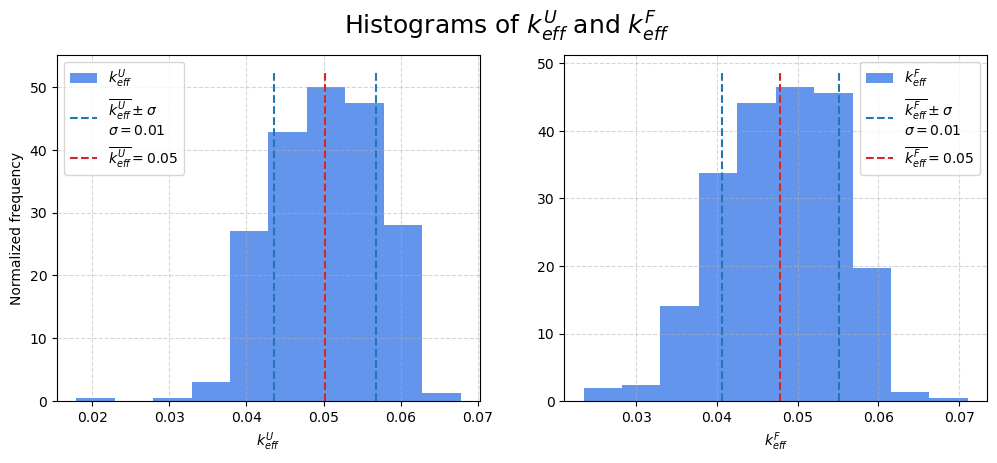

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))
to_plot_k_eff = [
    np.array([value['k_eff'] for molecule in molecules 
              for _, value in data[molecule]['U'].items() 
              if value['fileName'] in metaFile]), 
    np.array([value['k_eff'] for molecule in molecules 
              for _, value in data[molecule]['F'].items()
              if value['fileName'] in metaFile])
]
labels = ['k_{eff}^U', 'k_{eff}^F']
for ii in range(2):
    ax[ii].hist(to_plot_k_eff[ii], bins=10, density=True,
                color='cornflowerblue', label=fr'${labels[ii]}$')
    y_lim = ax[ii].get_ylim()
    ax[ii].vlines(np.mean(to_plot_k_eff[ii][to_plot_k_eff[ii] != 0])+np.std(to_plot_k_eff[ii][to_plot_k_eff[ii] != 0]), 
                  *y_lim, color='tab:blue', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}\pm \sigma$'+f'\n'+fr'$\sigma={np.std(to_plot_k_eff[ii][to_plot_k_eff[ii] != 0]):.2f}$')
    ax[ii].vlines(np.mean(to_plot_k_eff[ii][to_plot_k_eff[ii] != 0])-np.std(to_plot_k_eff[ii]), 
                  *y_lim, color='tab:blue', ls='--', label=None)
    ax[ii].vlines(np.mean(to_plot_k_eff[ii][to_plot_k_eff[ii] != 0]), 
                  *y_lim, color='tab:red', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}=$'+f'{np.mean(to_plot_k_eff[ii][to_plot_k_eff[ii] != 0]):.2f}')
    ax[ii].set_xlabel(fr'${labels[ii]}$')
    ax[ii].set_ylabel(r'Normalized frequency') if ii == 0 else None
    ax[ii].grid(ls='--', alpha=0.5)
    ax[ii].legend(loc='best')
plt.suptitle(r'Histograms of $k_{eff}^U$ and $k_{eff}^F$', fontsize=18)
plt.show()

In [32]:
from sklearn.cluster import KMeans

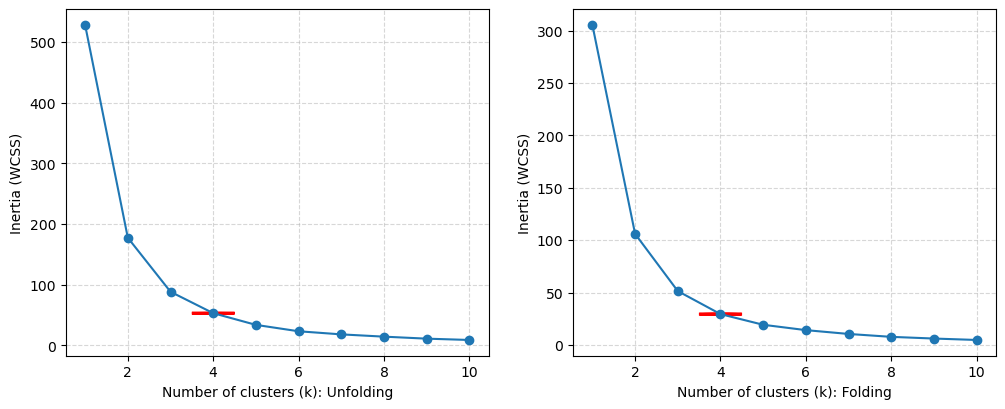

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))
lab = ['Unfolding', 'Folding']
for ii in range(2):
    inertia = []
    k_values = range(1, 11)
    X = np.concatenate((to_plot_f_rupture[ii].reshape(-1, 1),
                        to_plot_k_eff[ii].reshape(-1, 1)), axis=1)
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
        inertia.append(kmeans.inertia_)
    ax[ii].plot(k_values, inertia, marker='o')
    ax[ii].set_xlabel(f'Number of clusters (k): {lab[ii]}')
    ax[ii].set_ylabel('Inertia (WCSS)')
    ax[ii].grid(ls='--', alpha=0.5)
    elbow_k = 4
    elbow_inertia = inertia[elbow_k-1]
    circle = plt.Circle((elbow_k, elbow_inertia), radius=0.5, 
                        color='red', fill=False, linewidth=2)
    ax[ii].add_patch(circle)

plt.show()

In [34]:
kmeans = KMeans(n_clusters=elbow_k, random_state=42)

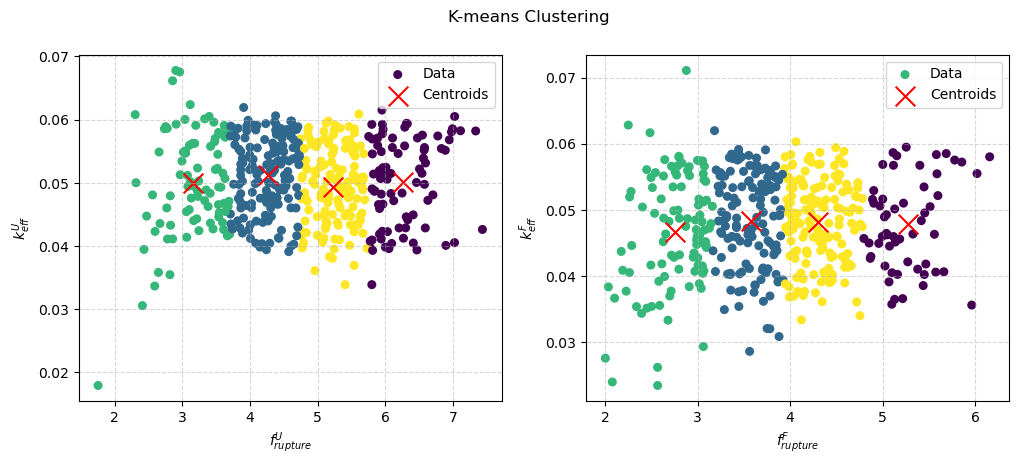

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))
lab = ['U', 'F']
for ii in range(2):
    X = np.concatenate((to_plot_f_rupture[ii].reshape(-1, 1), 
                        to_plot_k_eff[ii].reshape(-1, 1)), axis=1)
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    ax[ii].scatter(X[:, 0], X[:, 1], s=30, c=labels, 
                cmap='viridis', label='Data')
    ax[ii].scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')
    ax[ii].set_xlabel('$f_{rupture}^{'+lab[ii]+'}$')
    ax[ii].set_ylabel("$k_{eff}^{"+lab[ii]+'}$')
    ax[ii].grid(ls='--', alpha=0.5)
    ax[ii].legend(loc='best')
plt.suptitle("K-means Clustering")
plt.show()

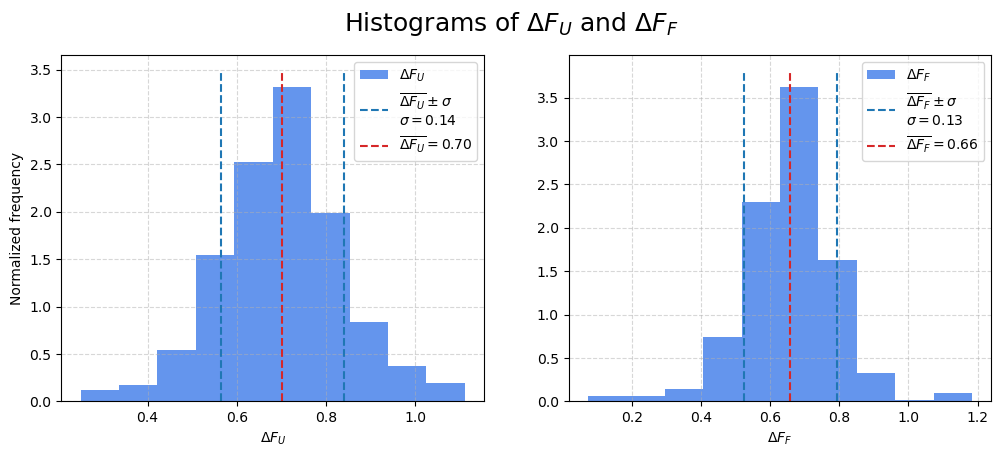

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))
to_plot_deltaF = [
    np.array([abs(value['f_rupture_next'] - value['f_rupture']) for molecule in molecules 
              for _, value in data[molecule]['U'].items() 
              if value['fileName'] in metaFile]), 
    np.array([abs(value['f_rupture_next'] - value['f_rupture']) for molecule in molecules 
              for _, value in data[molecule]['F'].items()
              if value['fileName'] in metaFile])
]
labels = ['\Delta F_{U}', '\Delta F_{F}']
for ii in range(2):
    ax[ii].hist(to_plot_deltaF[ii], bins=10, density=True,
                color='cornflowerblue', label=fr'${labels[ii]}$')
    y_lim = ax[ii].get_ylim()
    ax[ii].vlines(np.mean(to_plot_deltaF[ii][to_plot_deltaF[ii] != 0])+np.std(to_plot_deltaF[ii][to_plot_deltaF[ii] != 0]), 
                  *y_lim, color='tab:blue', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}\pm \sigma$'+f'\n'+fr'$\sigma={np.std(to_plot_deltaF[ii][to_plot_deltaF[ii] != 0]):.2f}$')
    ax[ii].vlines(np.mean(to_plot_deltaF[ii][to_plot_deltaF[ii] != 0])-np.std(to_plot_deltaF[ii]), 
                  *y_lim, color='tab:blue', ls='--', label=None)
    ax[ii].vlines(np.mean(to_plot_deltaF[ii][to_plot_deltaF[ii] != 0]), 
                  *y_lim, color='tab:red', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}=$'+f'{np.mean(to_plot_deltaF[ii][to_plot_deltaF[ii] != 0]):.2f}')
    ax[ii].set_xlabel(fr'${labels[ii]}$')
    ax[ii].set_ylabel(r'Normalized frequency') if ii == 0 else None
    ax[ii].grid(ls='--', alpha=0.5)
    ax[ii].legend(loc='best')
plt.suptitle(r'Histograms of $\Delta F_{U}$ and $\Delta F_{F}$', fontsize=18)
plt.show()

In [ ]:
# fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))
# lab = ['Unfolding', 'Folding']
# for ii in range(2):
#     inertia = []
#     k_values = range(1, 11)
#     X = np.concatenate((to_plot_f_rupture[ii].reshape(-1, 1),
#                         to_plot_deltaF[ii].reshape(-1, 1)), axis=1)
#     for k in k_values:
#         kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
#         inertia.append(kmeans.inertia_)
#     ax[ii].plot(k_values, inertia, marker='o')
#     ax[ii].set_xlabel(f'Number of clusters (k): {lab[ii]}')
#     ax[ii].set_ylabel('Inertia (WCSS)')
#     ax[ii].grid(ls='--', alpha=0.5)
#     elbow_k = 4
#     elbow_inertia = inertia[elbow_k-1]
#     circle = plt.Circle((elbow_k, elbow_inertia), radius=0.5, 
#                         color='red', fill=False, linewidth=2)
#     ax[ii].add_patch(circle)

# plt.show()

In [38]:
fileNumb = -1

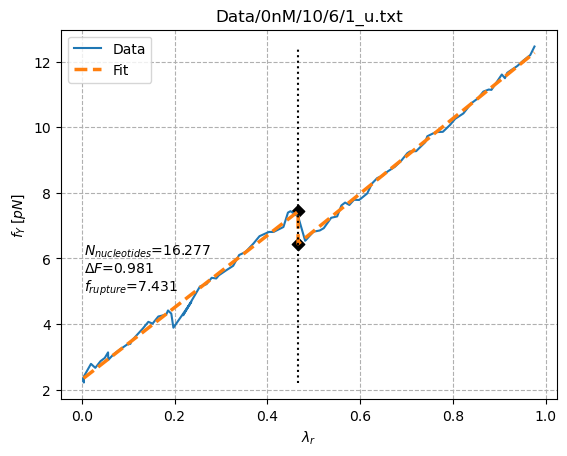

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides     t_0       λ_0  \
0   7.430946        6.450048  24.471586      16.276628  0.0498  0.466075   

       a_pre     b_pre     a_post    b_post  N_fits  
0  10.994798  2.306545  11.427695  1.123886       2  


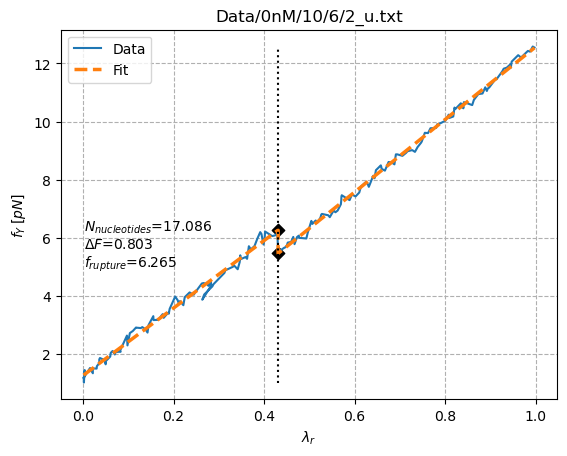

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides      t_0       λ_0  \
0   6.265157        5.462213  20.831309      17.086139  0.09961  0.430964   

       a_pre     b_pre     a_post    b_post  N_fits  
0  11.612346  1.260659  12.491933  0.078644       2  


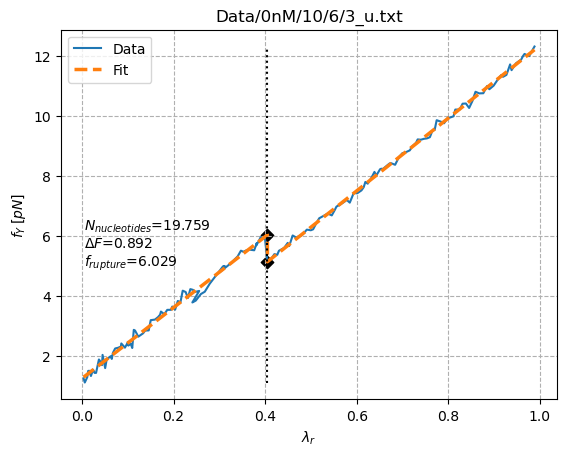

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides      t_0       λ_0  \
0   6.028668        5.136894  22.433718       19.75851  0.07227  0.404892   

       a_pre    b_pre     a_post    b_post  N_fits  
0  11.795133  1.25291  12.100558  0.237472       2  


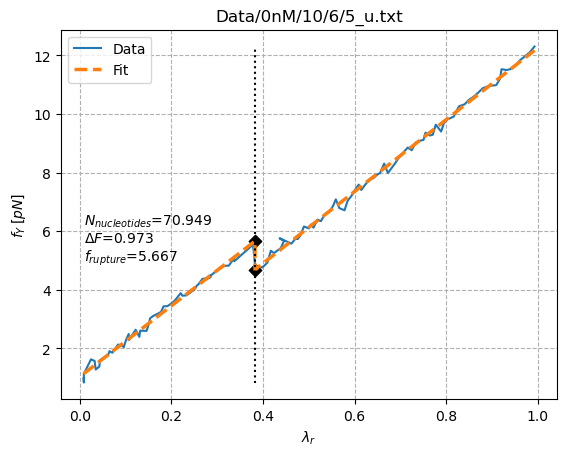

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides      t_0       λ_0  \
0   5.666688        4.694162  24.446583      70.949053  0.05274  0.382583   

       a_pre     b_pre     a_post    b_post  N_fits  
0  12.086276  1.042687  12.248456  0.008114       2  


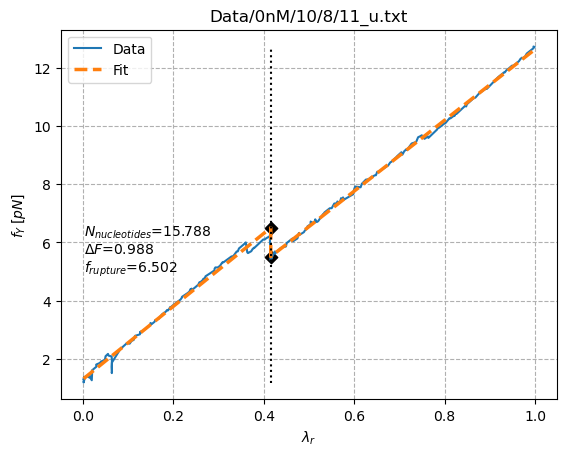

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides      t_0       λ_0  \
0   6.502304        5.514672  20.300852      15.787776  0.12305  0.415513   

       a_pre     b_pre    a_post    b_post  N_fits  
0  12.505783  1.305993  12.16763  0.458868       2  


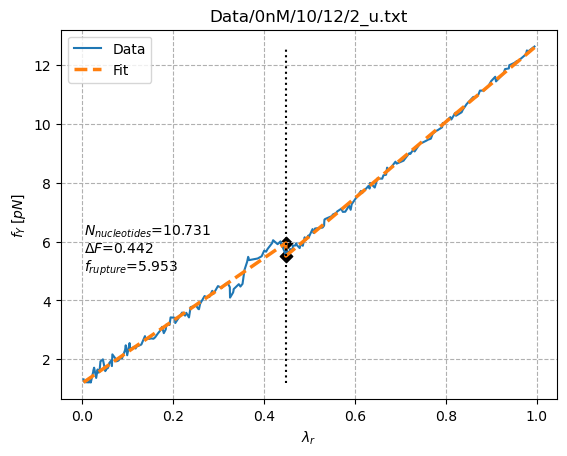

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides      t_0       λ_0  \
0   5.952868        5.511368  11.757183      10.731185  0.10157  0.448119   

       a_pre     b_pre     a_post    b_post  N_fits  
0  10.655956  1.177728  12.976324 -0.303574       2  


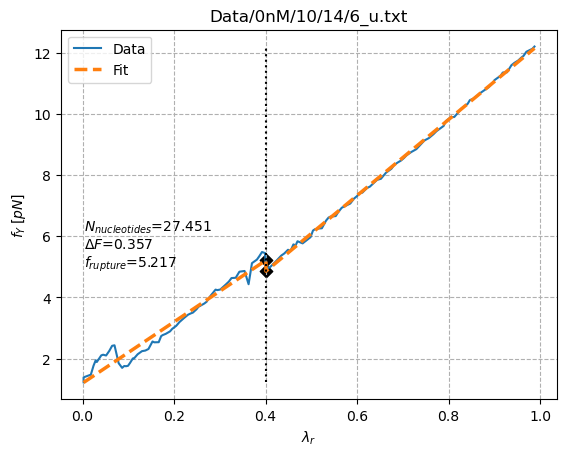

   f_rupture  f_rupture_next  x_ssDNA  N_nucleotides     t_0       λ_0  \
0   5.216992        4.860363  9.16444      27.450865  0.0625  0.400607   

       a_pre     b_pre     a_post    b_post  N_fits  
0  10.020541  1.202698  12.402708 -0.108243       2  


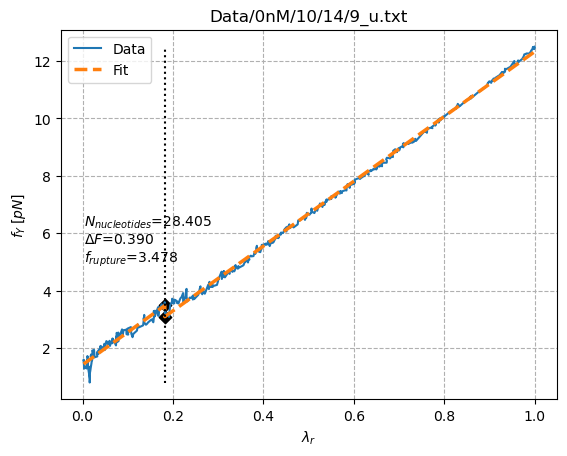

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0    3.47818        3.087887  7.863996      28.405068  0.14453  0.181929   

       a_pre     b_pre     a_post    b_post  N_fits  
0  11.361677  1.411166  11.301199  1.031876       2  


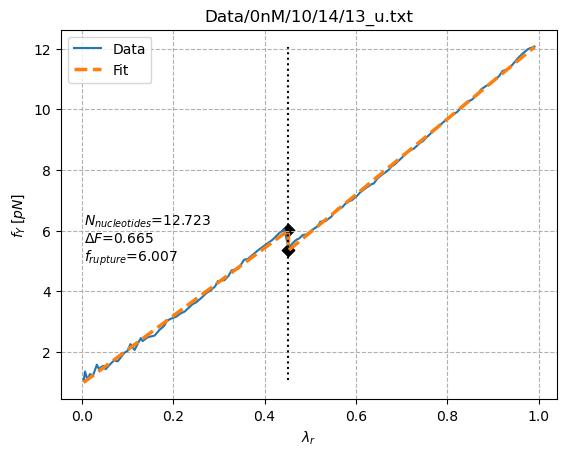

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides      t_0       λ_0  \
0   6.006877        5.342229  14.318669      12.723329  0.05274  0.451987   

       a_pre     b_pre    a_post    b_post  N_fits  
0  11.210747  0.939768  12.47646 -0.296966       2  


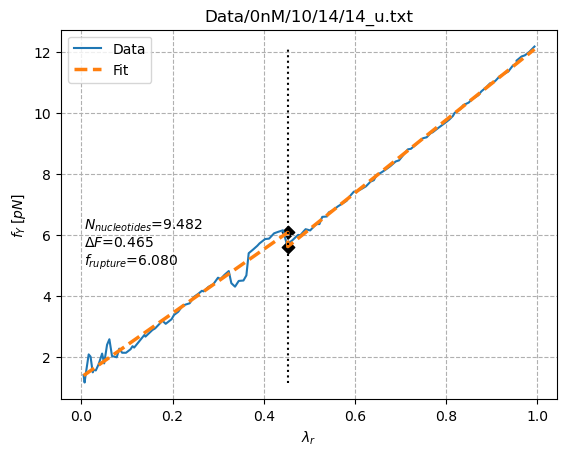

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides     t_0       λ_0  \
0   6.080475        5.615231  10.96859        9.48211  0.0664  0.452842   

       a_pre     b_pre     a_post    b_post  N_fits  
0  10.482815  1.333412  11.963953  0.197445       2  


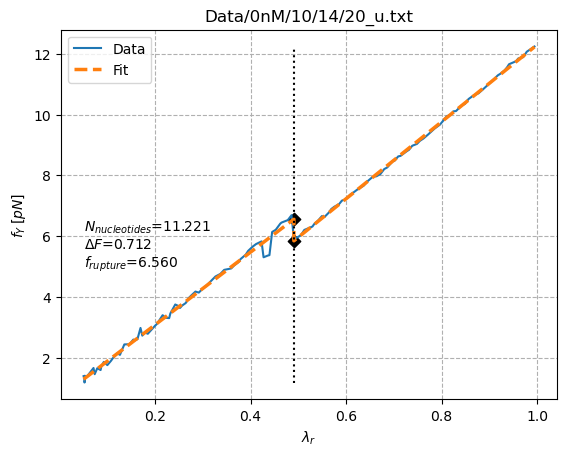

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides      t_0       λ_0  \
0   6.559877        5.847446  14.597548      11.221466  0.07032  0.490803   

       a_pre     b_pre     a_post    b_post  N_fits  
0  11.952333  0.693631  12.655698 -0.364015       2  


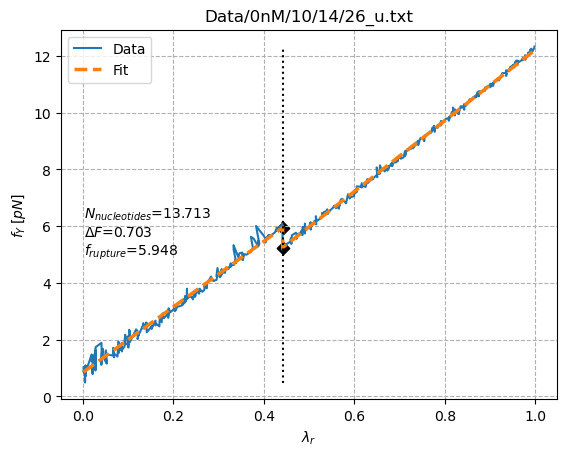

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides      t_0       λ_0  \
0   5.947548        5.244091  14.974109      13.712571  0.27929  0.441512   

       a_pre     b_pre     a_post    b_post  N_fits  
0  11.559911  0.843713  12.492237 -0.271376       2  


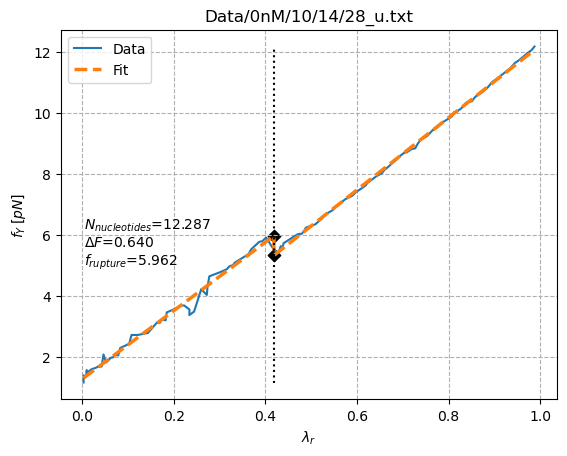

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides      t_0       λ_0  \
0   5.962024        5.322461  13.532929      12.286802  0.04883  0.418598   

       a_pre     b_pre     a_post   b_post  N_fits  
0  11.220719  1.265057  11.854821  0.36006       2  


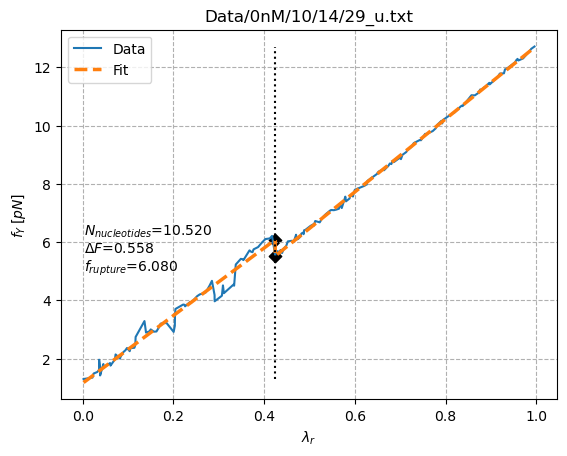

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides      t_0       λ_0  \
0   6.080417        5.522779  12.168885      10.519944  0.08789  0.424281   

       a_pre     b_pre     a_post    b_post  N_fits  
0  11.592218  1.162063  12.512357  0.214028       2  


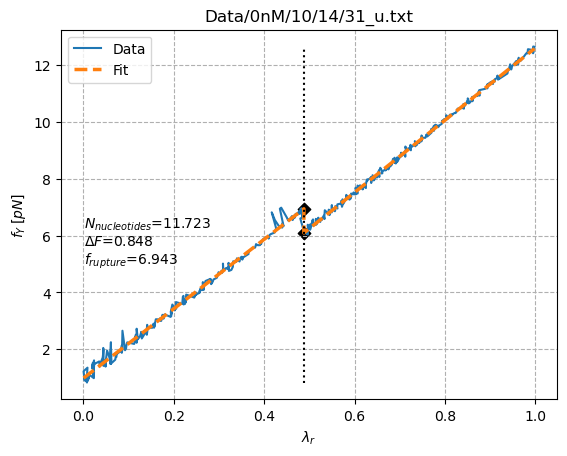

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides      t_0       λ_0  \
0   6.943015        6.094914  16.343733      11.723276  0.28125  0.487942   

       a_pre     b_pre     a_post    b_post  N_fits  
0  12.227466  0.976715  12.717429 -0.110459       2  


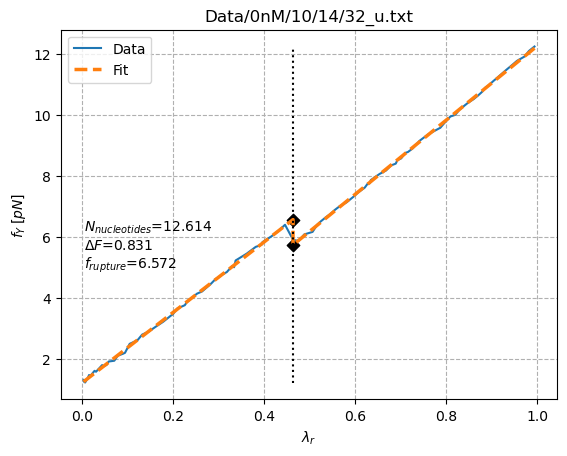

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides      t_0       λ_0  \
0   6.571626        5.740186  16.447217      12.614067  0.04882  0.462934   

       a_pre    b_pre     a_post    b_post  N_fits  
0  11.554175  1.22281  12.160288  0.110781       2  


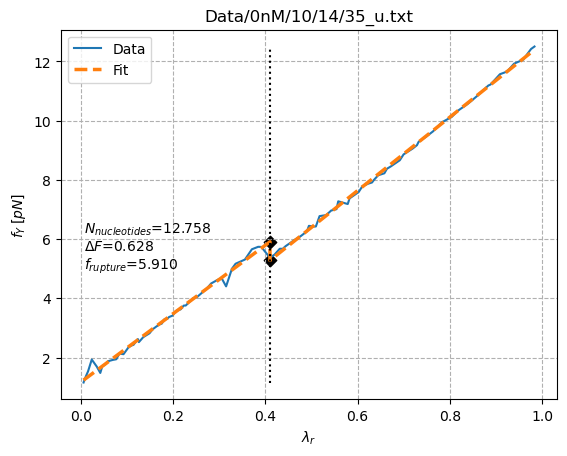

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides      t_0       λ_0  \
0   5.909921        5.281753  13.413538      12.757889  0.04883  0.410158   

       a_pre     b_pre     a_post    b_post  N_fits  
0  11.559223  1.168815  12.408384  0.192357       2  


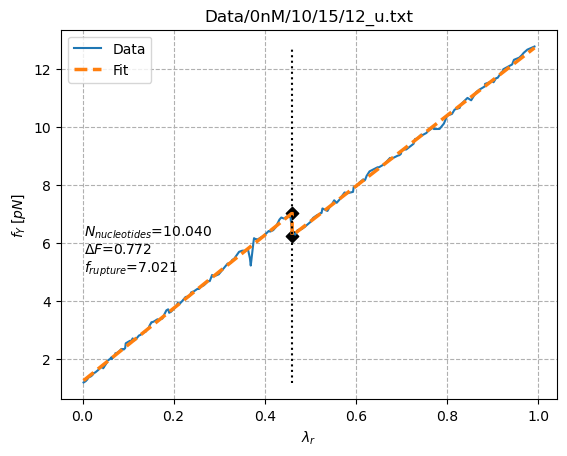

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides      t_0       λ_0  \
0   7.021014        6.249214  14.177417      10.039684  0.11718  0.460061   

       a_pre    b_pre     a_post    b_post  N_fits  
0  12.600149  1.22418  12.164404  0.652849       2  


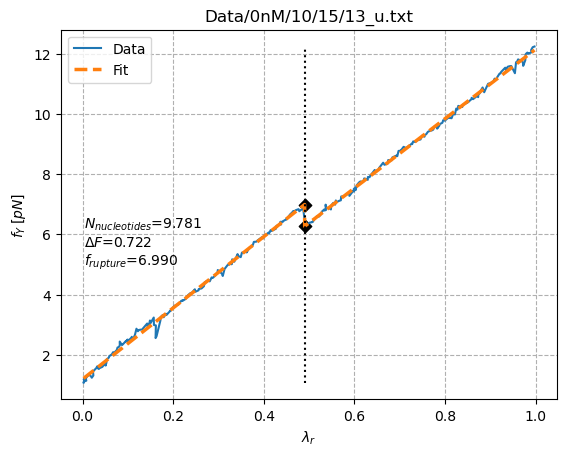

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides      t_0       λ_0  \
0   6.989588        6.267903  13.741518       9.781059  0.17969  0.490355   

       a_pre     b_pre     a_post    b_post  N_fits  
0  11.817628  1.194758  11.521491  0.618286       2  


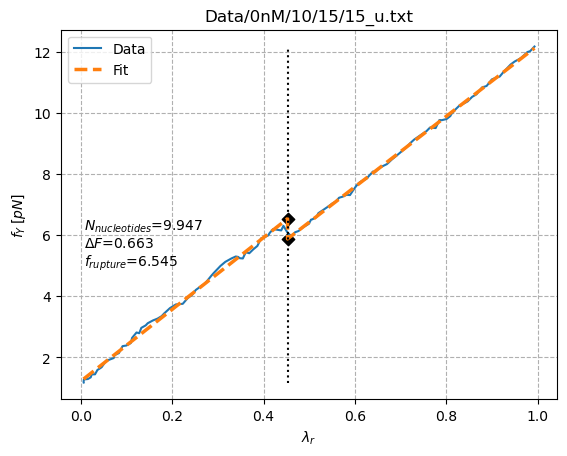

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides      t_0       λ_0  \
0   6.545283         5.88213  12.902551       9.947311  0.05664  0.452607   

       a_pre     b_pre     a_post    b_post  N_fits  
0  11.760346  1.222472  11.555409  0.652074       2  


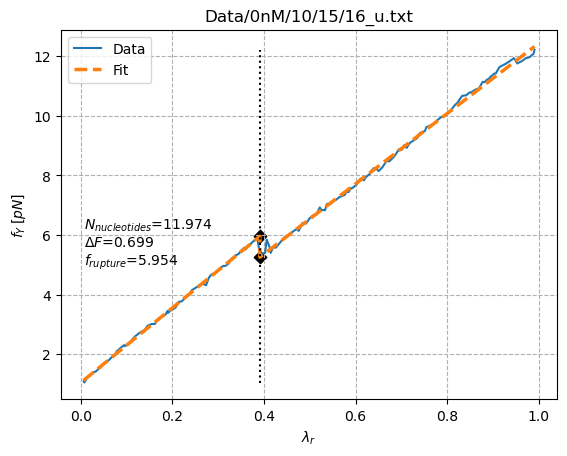

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides      t_0       λ_0  \
0    5.95368        5.254257  13.125438      11.974201  0.06836  0.390992   

       a_pre     b_pre    a_post    b_post  N_fits  
0  12.552124  1.045904  11.78706  0.645614       2  


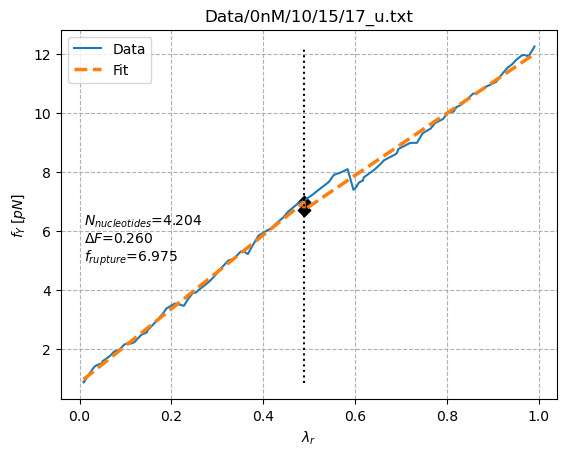

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   6.974795        6.714939  5.891325       4.203599  0.04492  0.488867   

       a_pre   b_pre     a_post   b_post  N_fits  
0  12.489268  0.8692  10.522546  1.57081       2  


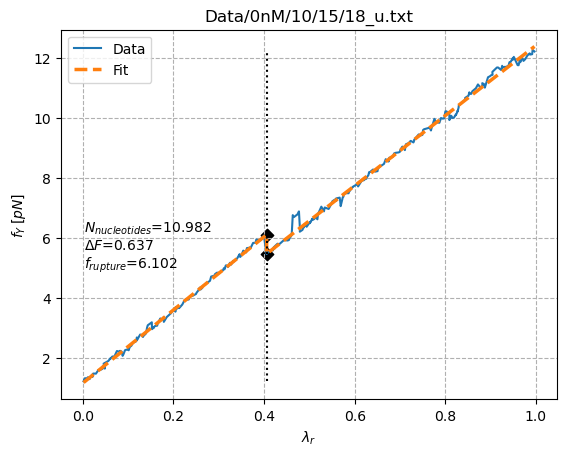

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides      t_0       λ_0  \
0    6.10161        5.464924  12.792208       10.98243  0.15234  0.405726   

      a_pre     b_pre     a_post    b_post  N_fits  
0  12.19074  1.155516  11.685183  0.723948       2  


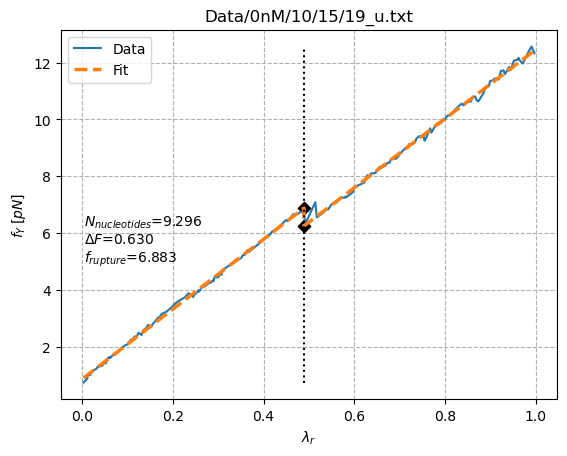

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides      t_0      λ_0  \
0   6.883141        6.253335  12.829065       9.295607  0.10156  0.48903   

      a_pre     b_pre     a_post   b_post  N_fits  
0  12.30263  0.866785  12.152332  0.31048       2  


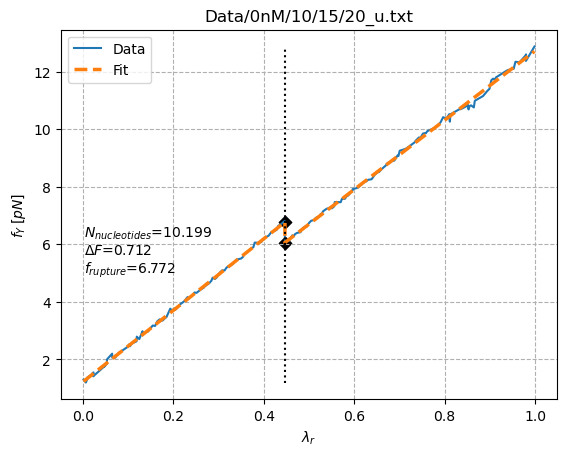

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides      t_0       λ_0  \
0   6.772259        6.059957  13.806123      10.198765  0.10547  0.446687   

       a_pre     b_pre     a_post   b_post  N_fits  
0  12.422758  1.223169  12.033912  0.68456       2  


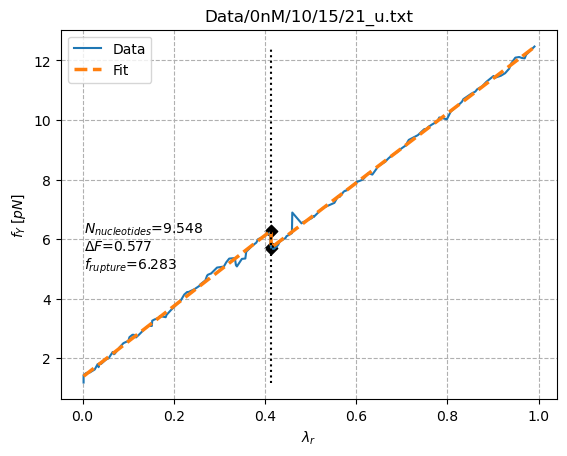

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides      t_0       λ_0  \
0   6.282618        5.705451  11.691045       9.547881  0.06836  0.413329   

       a_pre     b_pre     a_post    b_post  N_fits  
0  11.898247  1.364725  11.677604  0.878756       2  


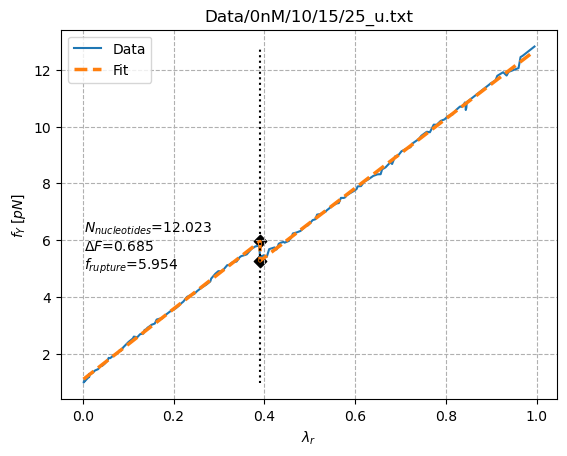

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides      t_0       λ_0  \
0   5.953738         5.26899  13.179006      12.022653  0.06836  0.390345   

       a_pre     b_pre     a_post    b_post  N_fits  
0  12.470059  1.086118  12.218753  0.499466       2  


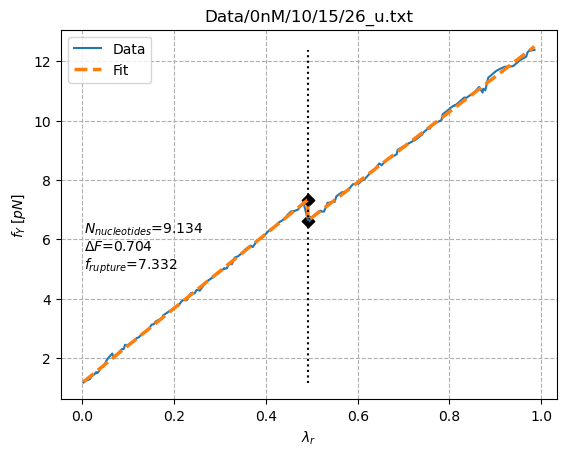

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   7.331749        6.627915  13.53492       9.134115  0.08985  0.491492   

       a_pre     b_pre     a_post    b_post  N_fits  
0  12.547076  1.164961  11.882776  0.787625       2  


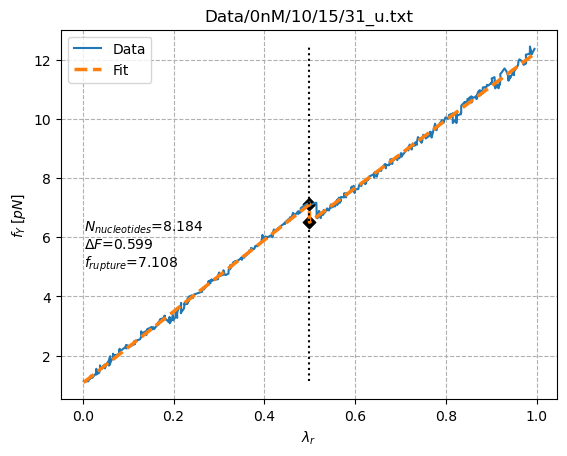

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides      t_0       λ_0  \
0   7.107892        6.508498  11.718591       8.183815  0.29882  0.499533   

      a_pre     b_pre     a_post    b_post  N_fits  
0  12.09129  1.067895  11.476261  0.775729       2  


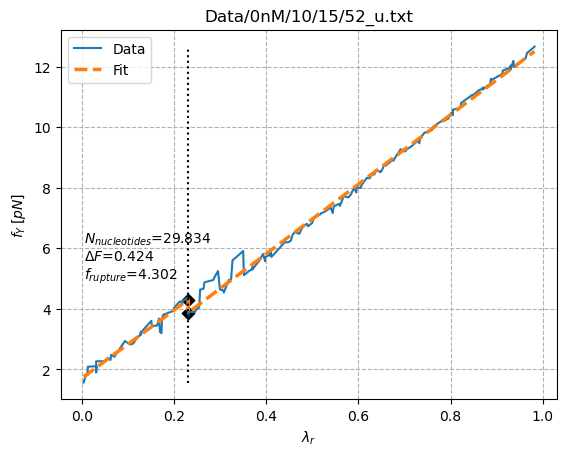

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   4.301817        3.877376  9.174759      29.834017  0.05469  0.230918   

       a_pre     b_pre     a_post    b_post  N_fits  
0  11.228025  1.709061  11.483489  1.225628       2  


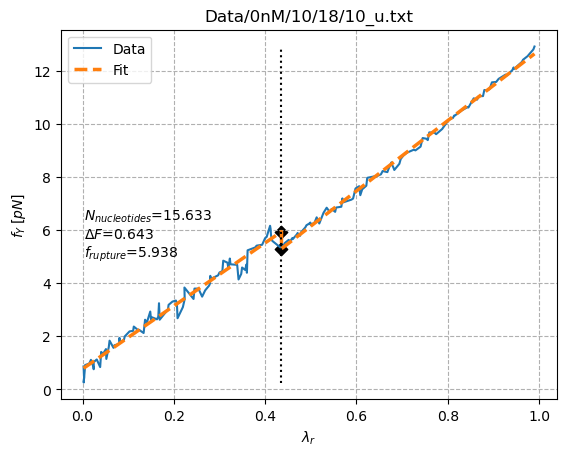

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides      t_0       λ_0  \
0   5.938366        5.295509  16.965269      15.632862  0.09668  0.435821   

       a_pre     b_pre     a_post    b_post  N_fits  
0  11.862384  0.768489  13.237069 -0.473484       2  


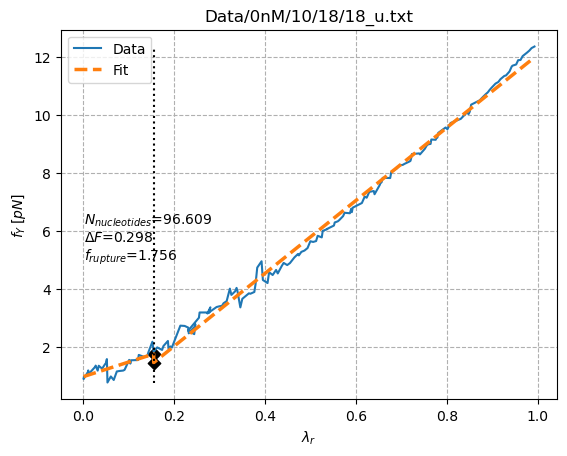

   f_rupture  f_rupture_next    x_ssDNA  N_nucleotides     t_0       λ_0  \
0   1.756411        1.458427  17.187945      96.609456  0.0293  0.155739   

     a_pre     b_pre     a_post    b_post  N_fits  
0  5.06199  0.968063  12.584216 -0.501423       2  


In [97]:
for ii, element in enumerate(path_re_analyze_U):
    if ii <= fileNumb:
        continue
    number, N = element.split('/')[-2:]
    N, _ = N.split('_') 
    file = reading.readTxt(number=int(number), N=int(N), 
                           ty='u', forced_reshaped=0, 
                           graph=True)
    print(reading.params_df)
    
    avanti = input("Next: ")
    if avanti == "":
        continue
    else:
        fileNumb = ii
        break

In [33]:
tot_numb_of_U = len([0 for dic in data.values() for sub_dic in dic['U'].values() if sub_dic['fileName'] in metaFile])
tot_numb_of_F = len([0 for dic in data.values() for sub_dic in dic['F'].values() if sub_dic['fileName'] in metaFile])
tot_numb_of_U, tot_numb_of_F

(473, 447)

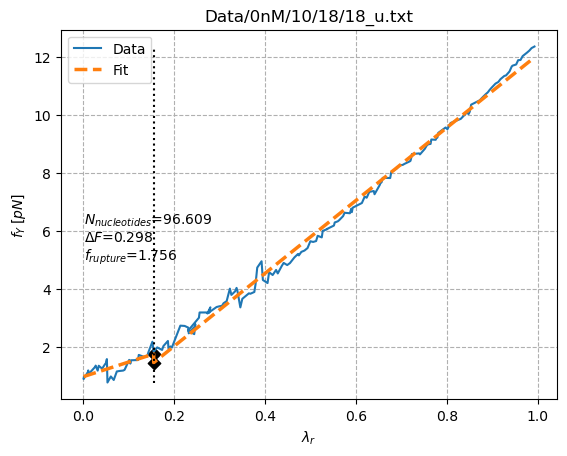

f_rupture  f_rupture_next    x_ssDNA  N_nucleotides     t_0       λ_0  \
0   1.756411        1.458427  17.187945      96.609456  0.0293  0.155739   

     a_pre     b_pre     a_post    b_post  N_fits  
0  5.06199  0.968063  12.584216 -0.501423       2

In [136]:
file = reading.readTxt(number=18, N=18, ty='u', forced_reshaped=0, graph=True) # 10 reshape works best
reading.params_df

### It would be nice to perform an analysis on the $N_{nucleotides}$ distribution: 
* the outliers (say $3\sigma$ away from the mean of the distribution) should be further investigated;
* the program could count the total number of outliers and ask the user if he/she wants to further analyse them;
* at this point, the program could ask, for each outlier case, where the rip should be situated and perform an analysis closer to the region highlighted by the user

In [25]:
reading.path

'Data/0nM/10/12/7_f.txt'

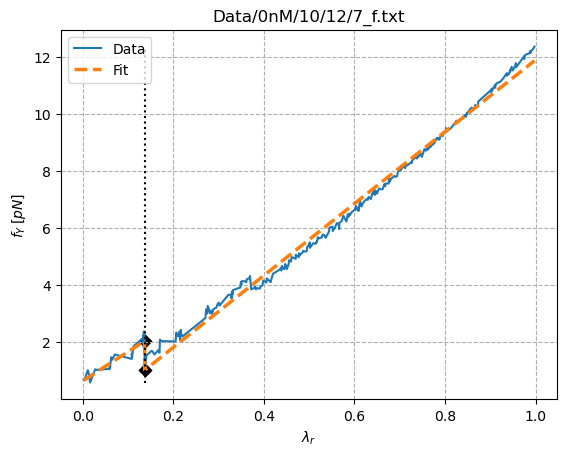

f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   2.044043        1.024786  25.94042     130.499699  3.34961  0.136585   

       a_pre    b_pre     a_post    b_post  N_fits  
0  10.201506  0.65067  12.579796 -0.693427       2

In [24]:
file = reading.readTxt(number=12, N=7, ty='f', forced_reshaped=0, graph=True) # 10 reshape works best
reading.params_df

In [20]:
force_Y_reshaped, λ_reshaped, time_reshaped = reading.reshape(20, 'mean')

In [26]:
reading.bootstrap(reading.λ, reading.force_Y, reading.time, *reading.find_jumps(reading.force_Y))

(29, 62.08298475082491, 88.05706377652226)

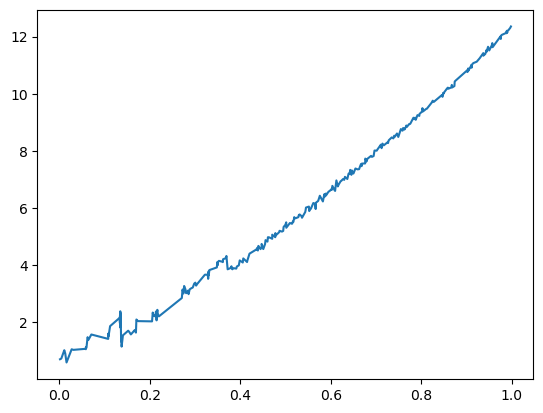

In [27]:
plt.plot(reading.λ, reading.force_Y);

In [ ]:
tot = sum([len(mm) for mm in all_molecules_f])
tot # total number of experiments performed

483

In [ ]:
# λ = reading.file[1:, -1]
# force_Y = np.abs(reading.file[1:, 2])
# plt.plot(λ, force_Y);

In [ ]:
# reading.params_df

In [ ]:
# reading.k_eff

In [ ]:
# f_max = f_MAX[4]
# colors = ["#7afdd6","#77ff94","#a1e44d","#60993e","#613a3a", 
#             "#e3b505","#95190c","#610345","#107e7d","#044b7f"]
# markers = ["D", "o", "v", "^", "1", "8", "s", "p", "*", "x"]

# for m in range(len(molecules)):
#     col = colors[m]
#     for i in range(len(all_molecules_f[m])):
#         lab = f'Molecule {m}' if i == 0 else ''
#         f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_f[m][i][0]
#         plt.scatter(t_0, f_next, c=col, marker=markers[m], label=lab)
# plt.grid()
# plt.legend(loc='best')
# plt.title(f'f_MAX = {f_max} -- Fold')
# # plt.xscale('log')
# plt.xlabel('Time [s]')
# plt.ylabel('$f_{rupture} \\:[pN]$')
# plt.show()

In [37]:
# Create folder for images
images_path = f'imgs/{folder}/{f_max}'
isExist = os.path.exists(images_path)
if not isExist:
    os.makedirs(images_path)
    print("The images directory is created...")

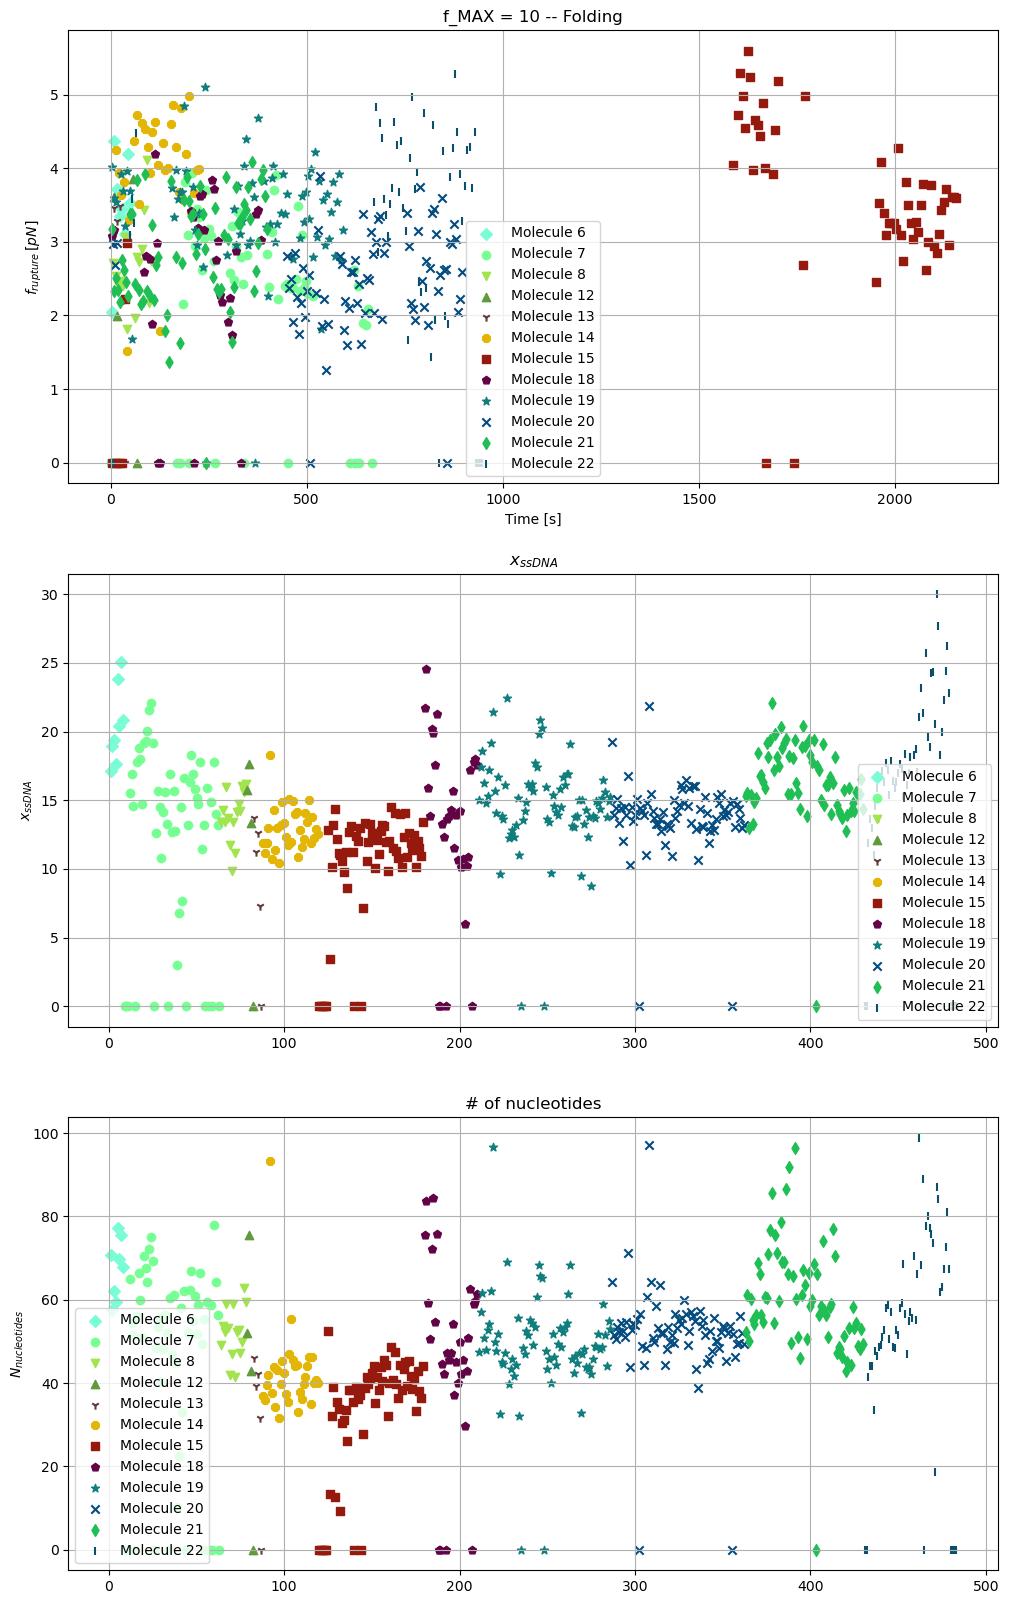

In [38]:
colors = ["#7afdd6","#77ff94","#a1e44d","#60993e","#613a3a", 
            "#e3b505","#95190c","#610345","#107e7d","#044b7f", 
            "#20bf55","#0b4f6c","#01baef","#fbfbff","#757575"]
markers = ["D", "o", "v", "^", "1", "8", "s", "p", "*", "x", 
           "d", "|", "_", "4", "P"]

fig, ax = plt.subplots(3, figsize=(12, 20))
g = 0
for m in range(len(molecules)):
    col = colors[m]
    for i in range(len(all_molecules_f[m])):
        g += 1
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, k_eff, t_0, _ = all_molecules_f[m][i][0]
        # if f != 0:
        ax[0].scatter(t_0, f_next, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)

ax[0].grid()
ax[0].legend(loc='best')
ax[0].set_title(f'f_MAX = {f_max} -- Folding')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

ax[1].grid()
ax[1].legend()
ax[1].set_title('$x_{ssDNA}$')
ax[1].set_ylabel('$x_{ssDNA}$')

ax[2].grid()
ax[2].legend()
ax[2].set_title('# of nucleotides')
ax[2].set_ylabel('$N_{nucleotides}$')

plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Folding.png', dpi=300, bbox_inches='tight')
plt.show()

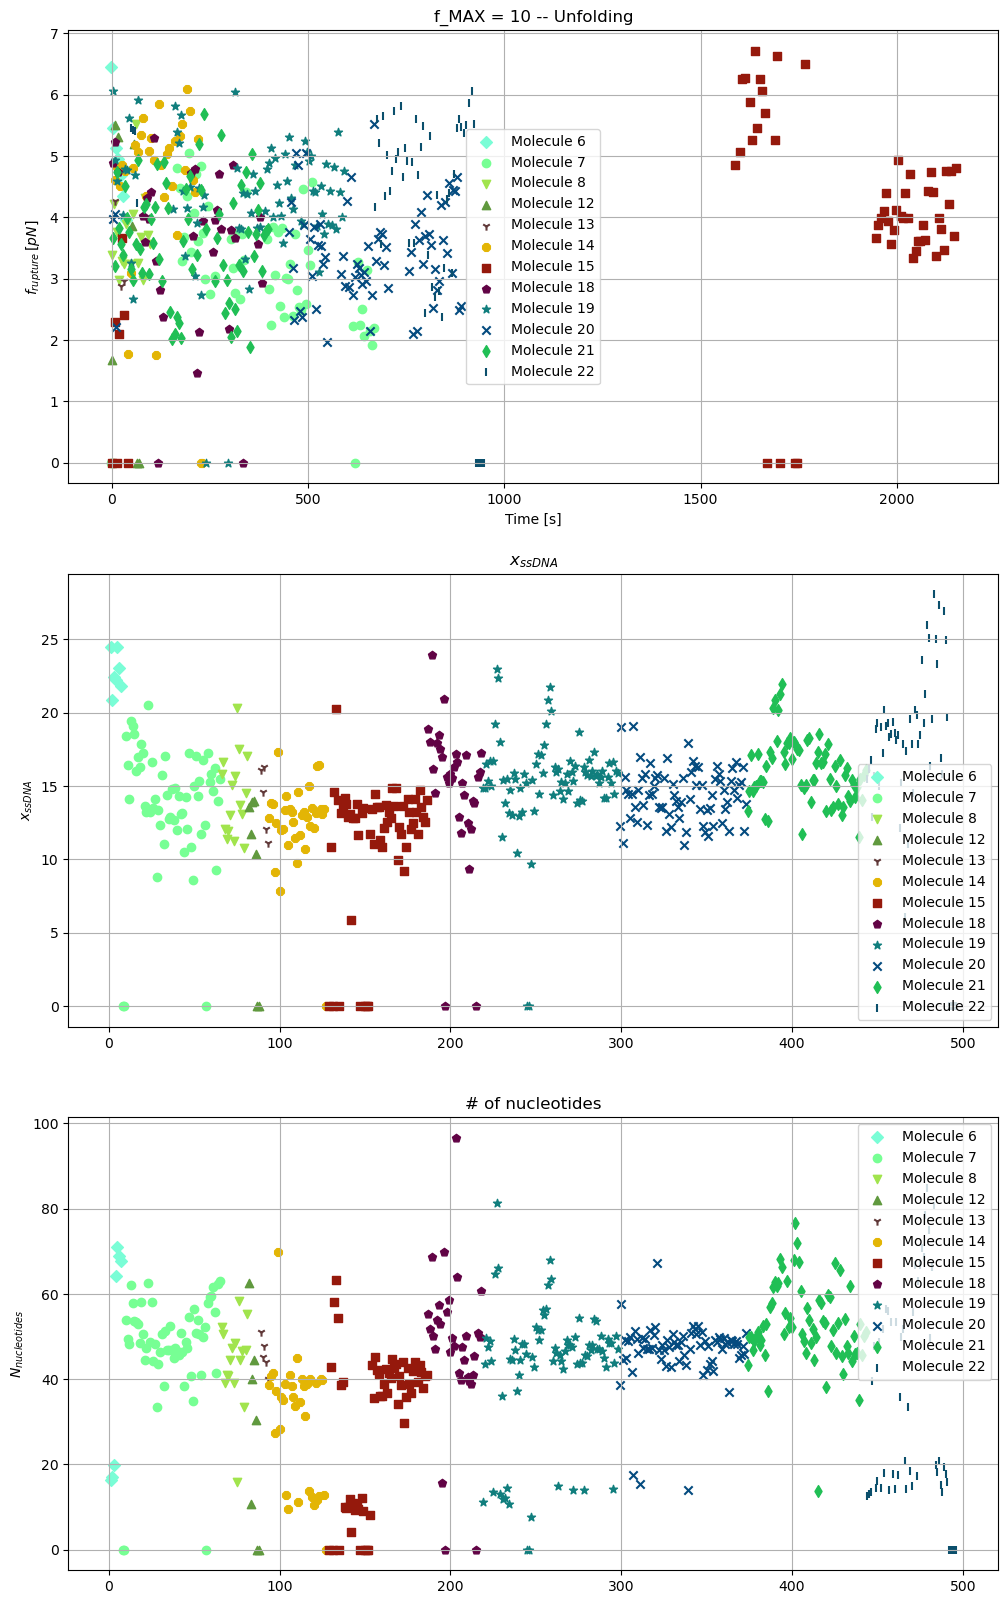

In [39]:
fig, ax = plt.subplots(3, figsize=(12, 20))
g = 0

for m in range(len(molecules)):
    col = colors[m]
    for i in range(len(all_molecules_u[m])):
        g += 1
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, k_eff, t_0, _ = all_molecules_u[m][i][0]
        # if f != 0:
        ax[0].scatter(t_0, f_next, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)

ax[0].grid()
ax[0].legend(loc='best')
ax[0].set_title(f'f_MAX = {f_max} -- Unfolding')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

ax[1].grid()
ax[1].legend()
ax[1].set_title('$x_{ssDNA}$')
ax[1].set_ylabel('$x_{ssDNA}$')

ax[2].grid()
ax[2].legend()
ax[2].set_title('# of nucleotides')
ax[2].set_ylabel('$N_{nucleotides}$')

plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Unfolding.png', dpi=300, bbox_inches='tight')
plt.show()

In [32]:
# Plots per single molecule

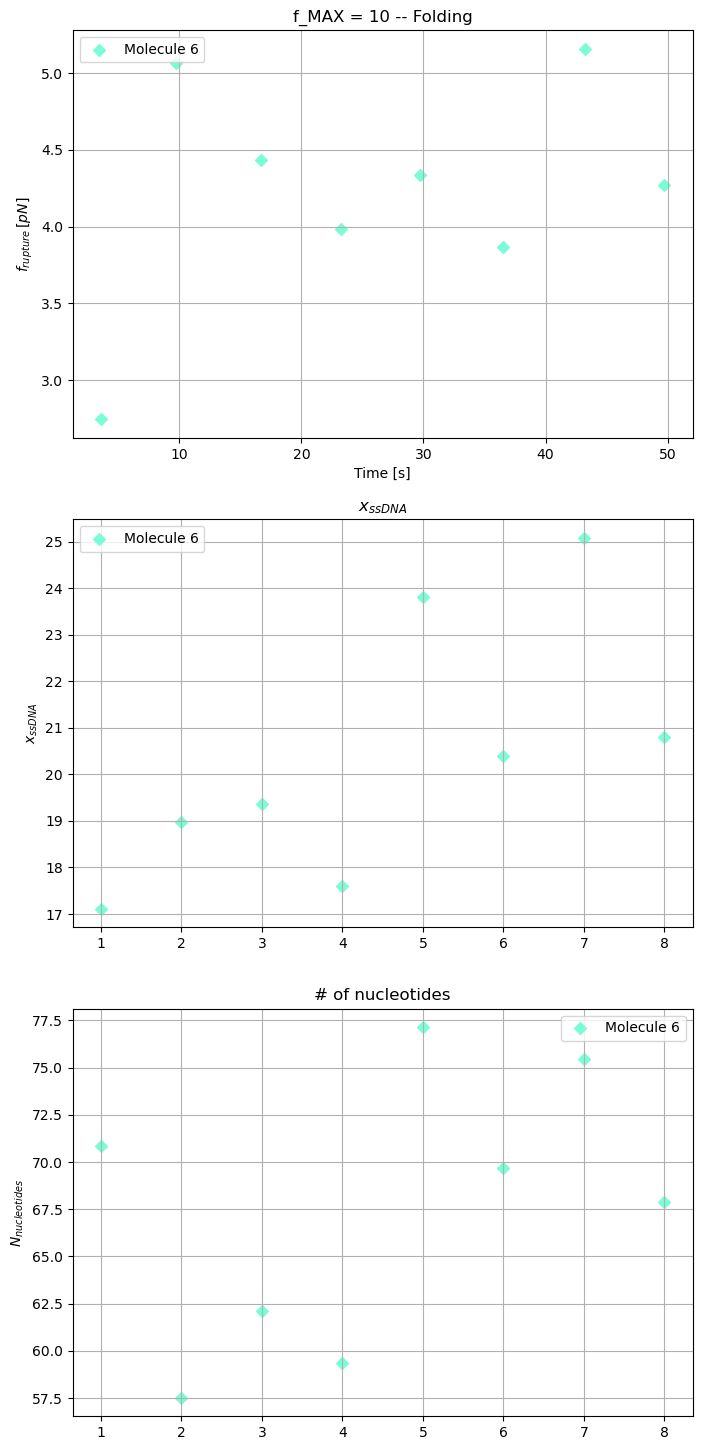

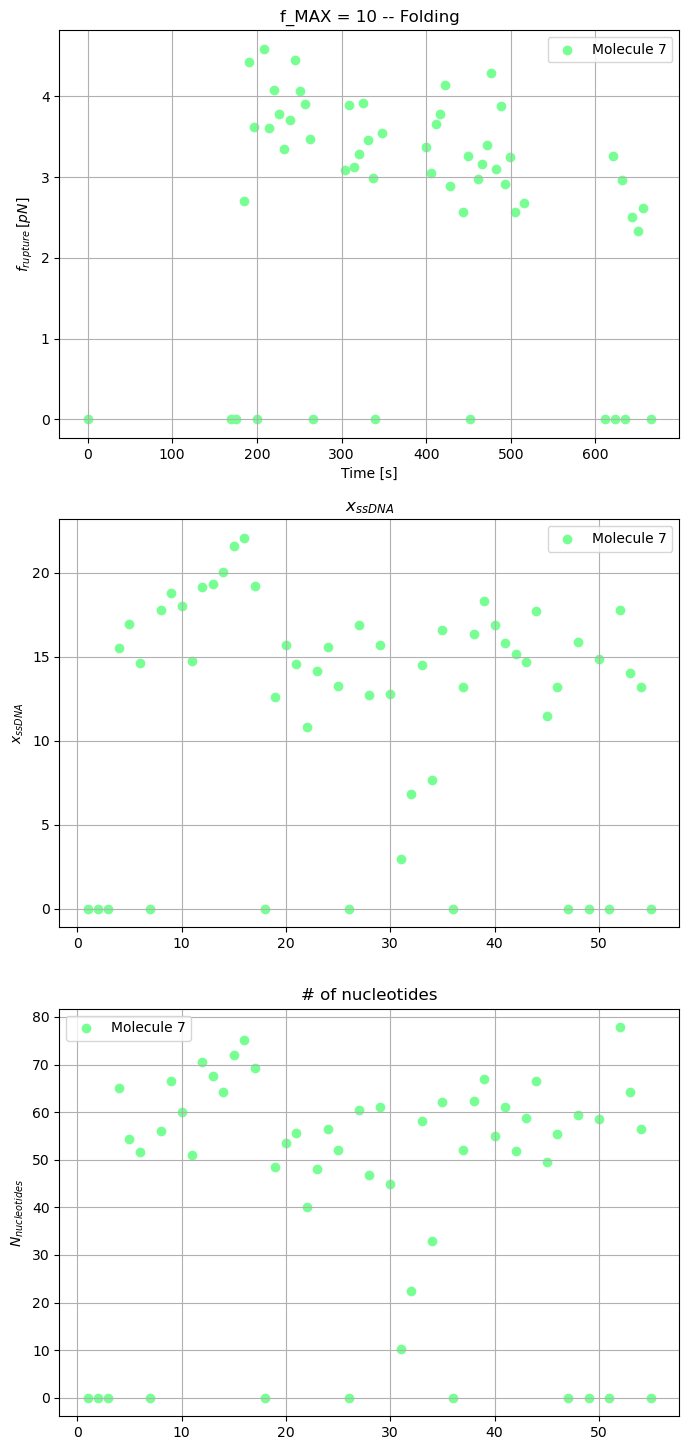

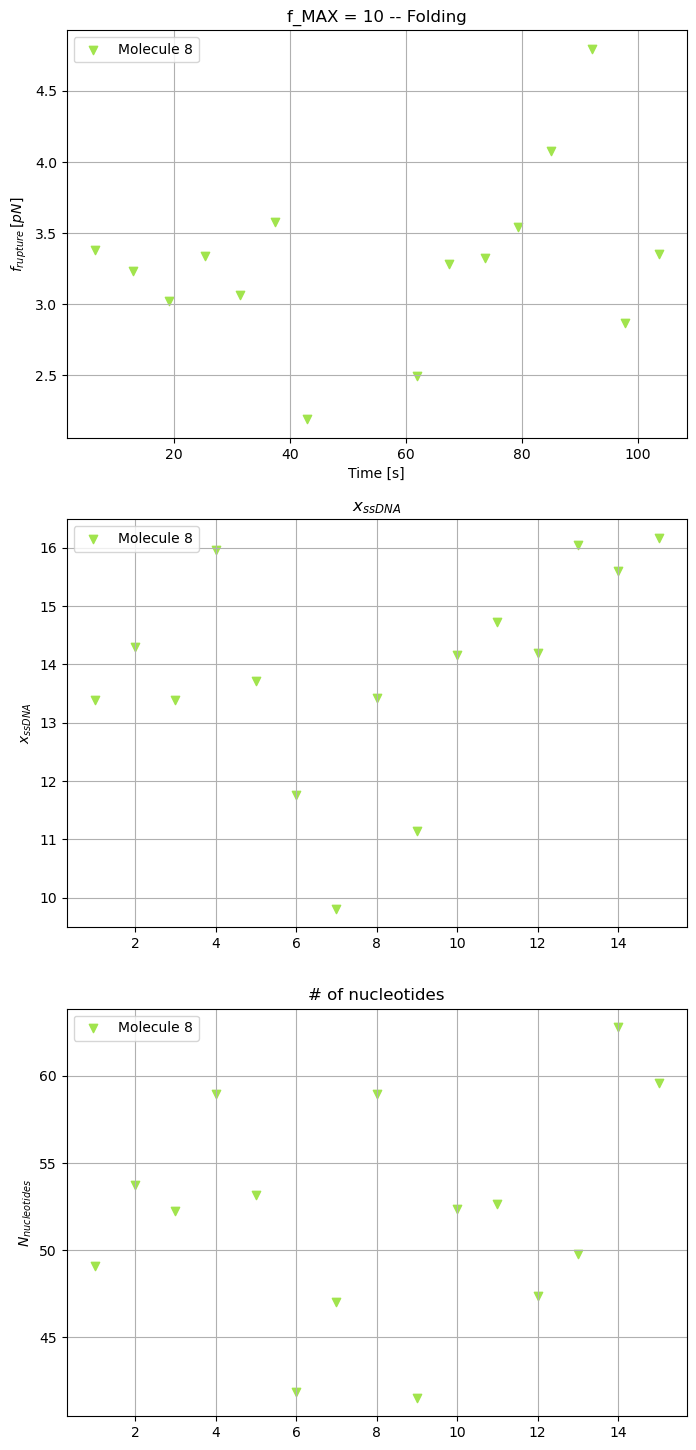

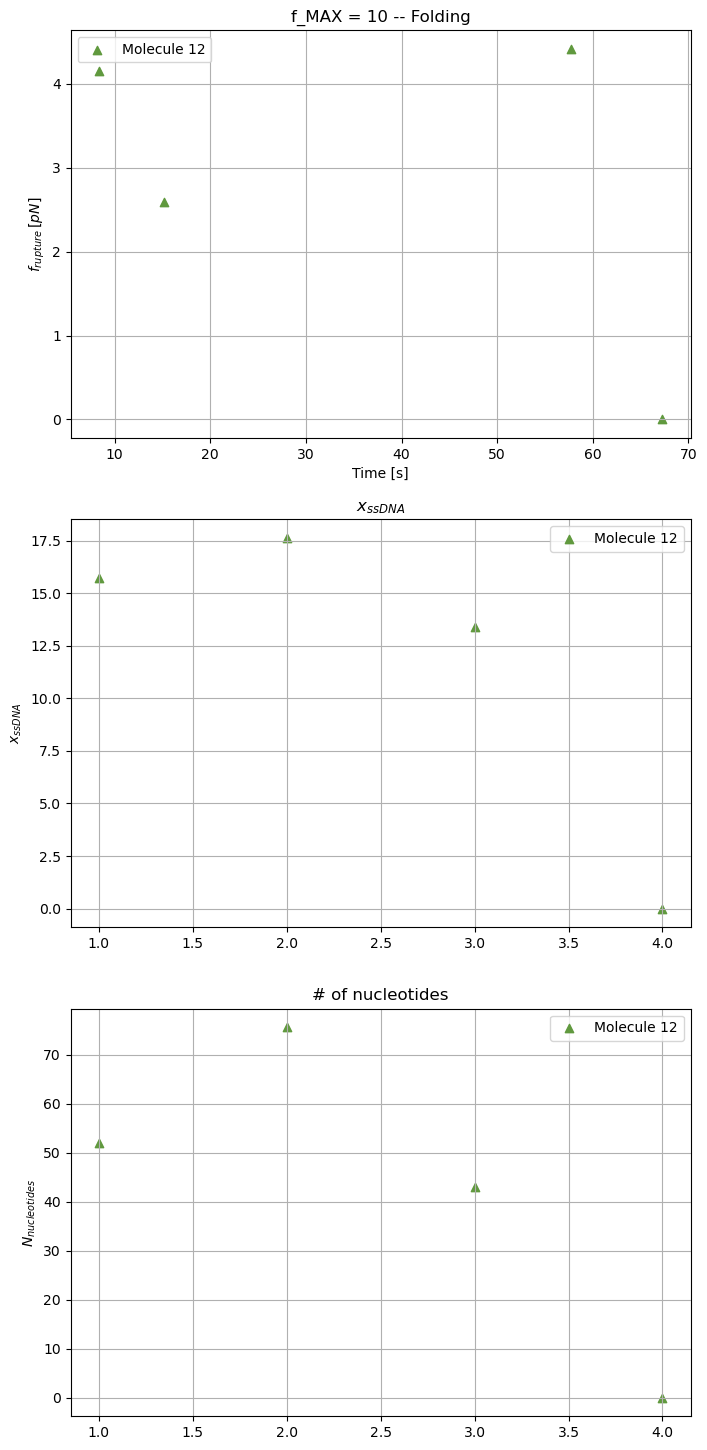

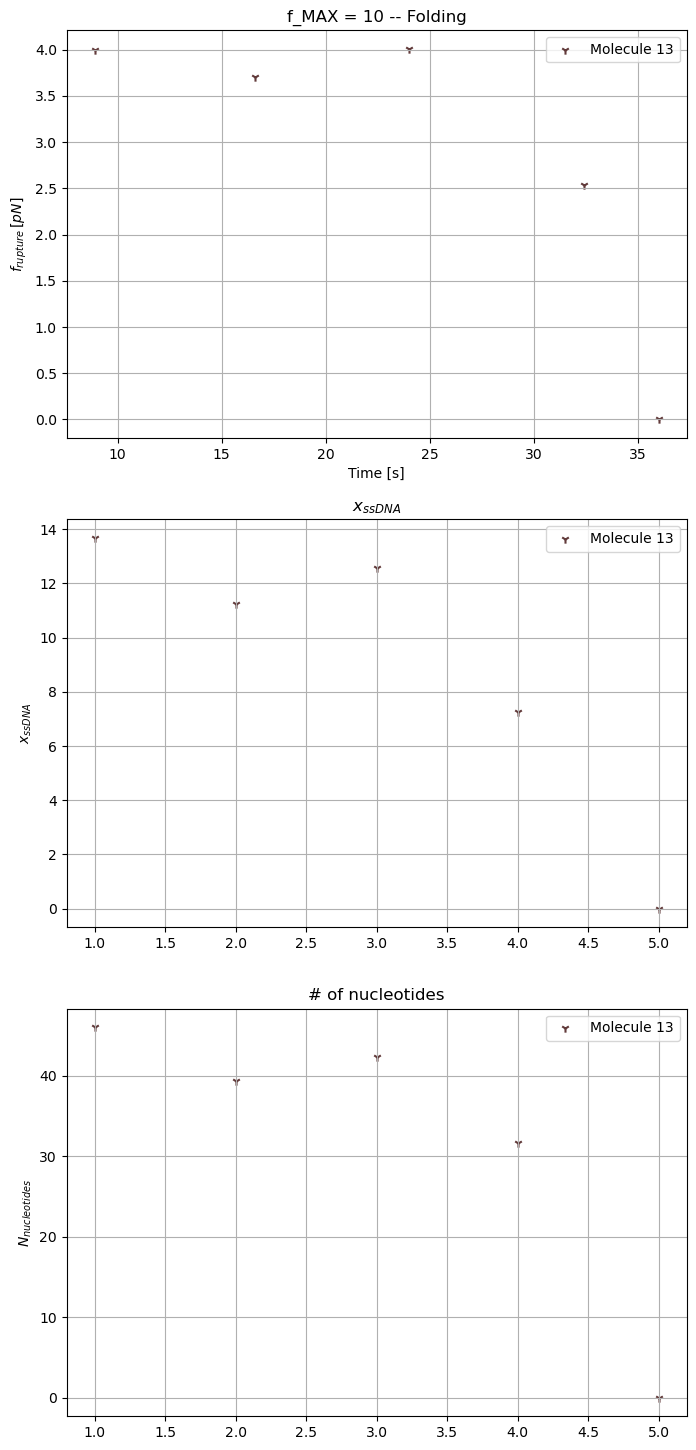

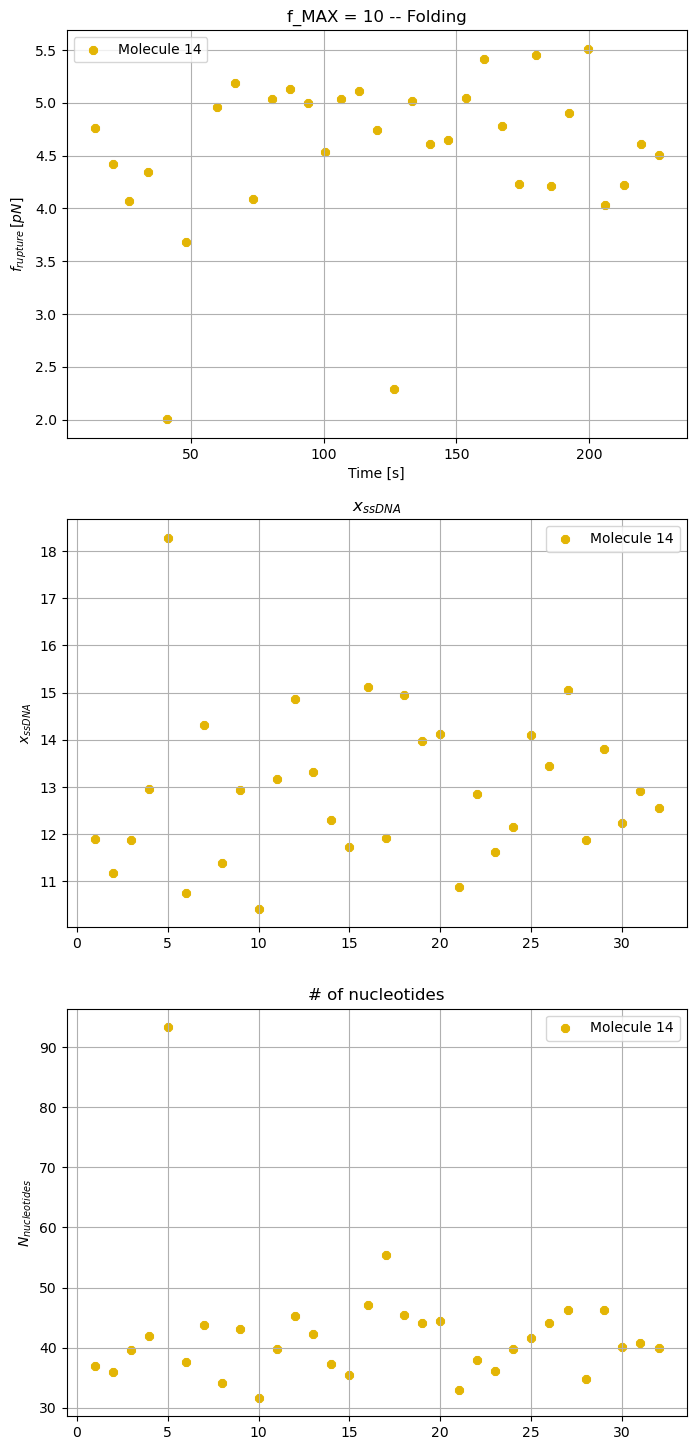

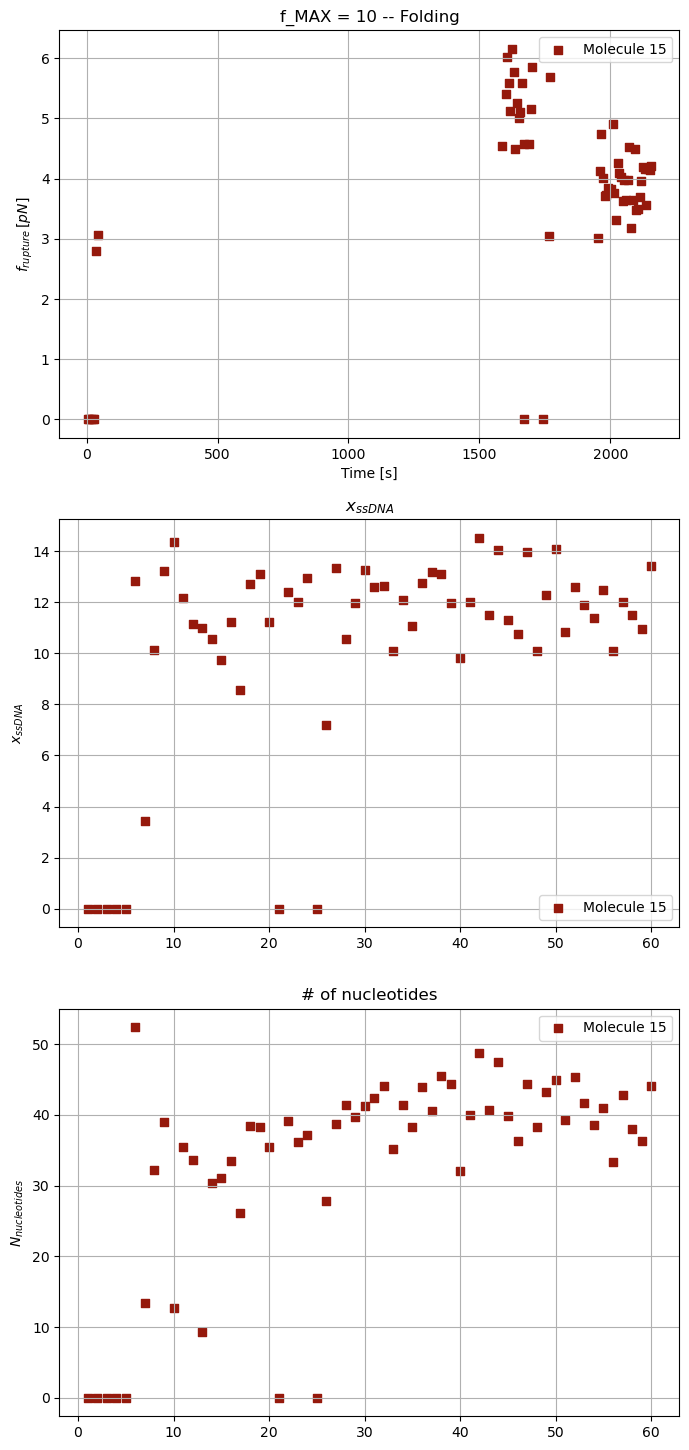

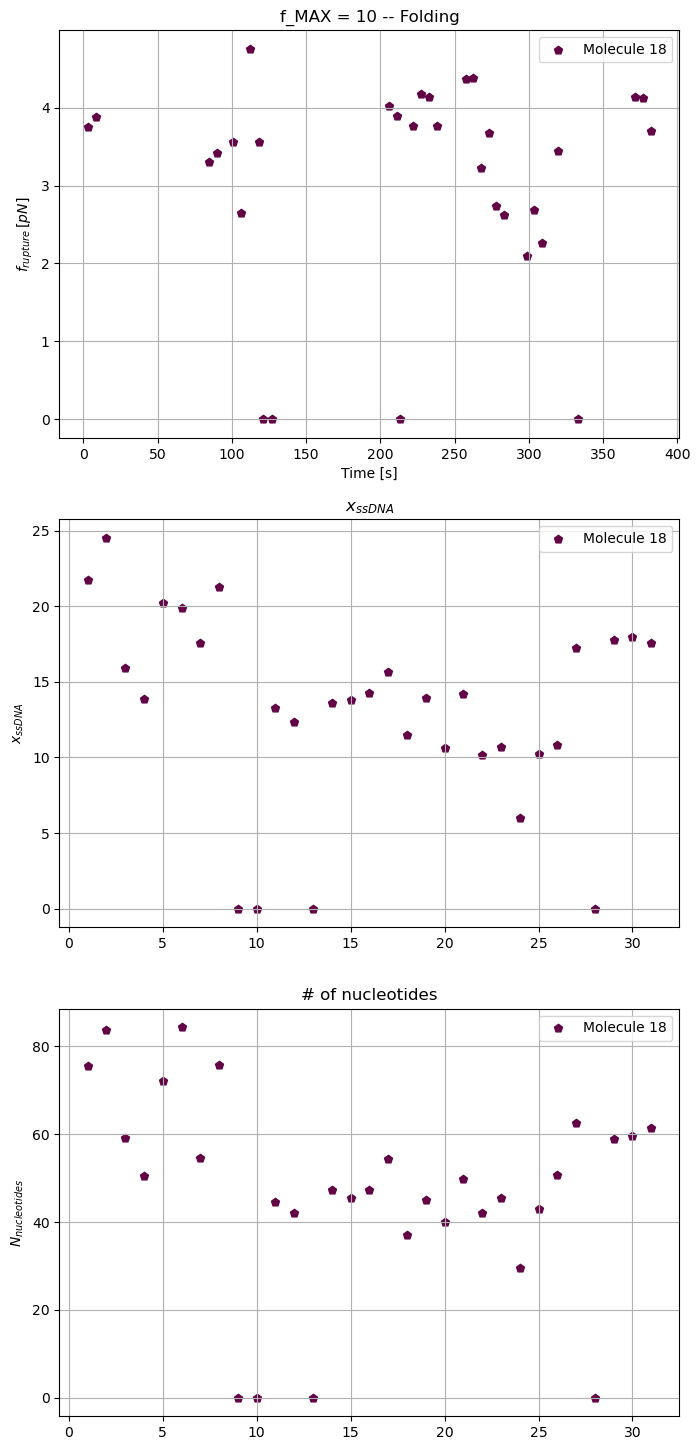

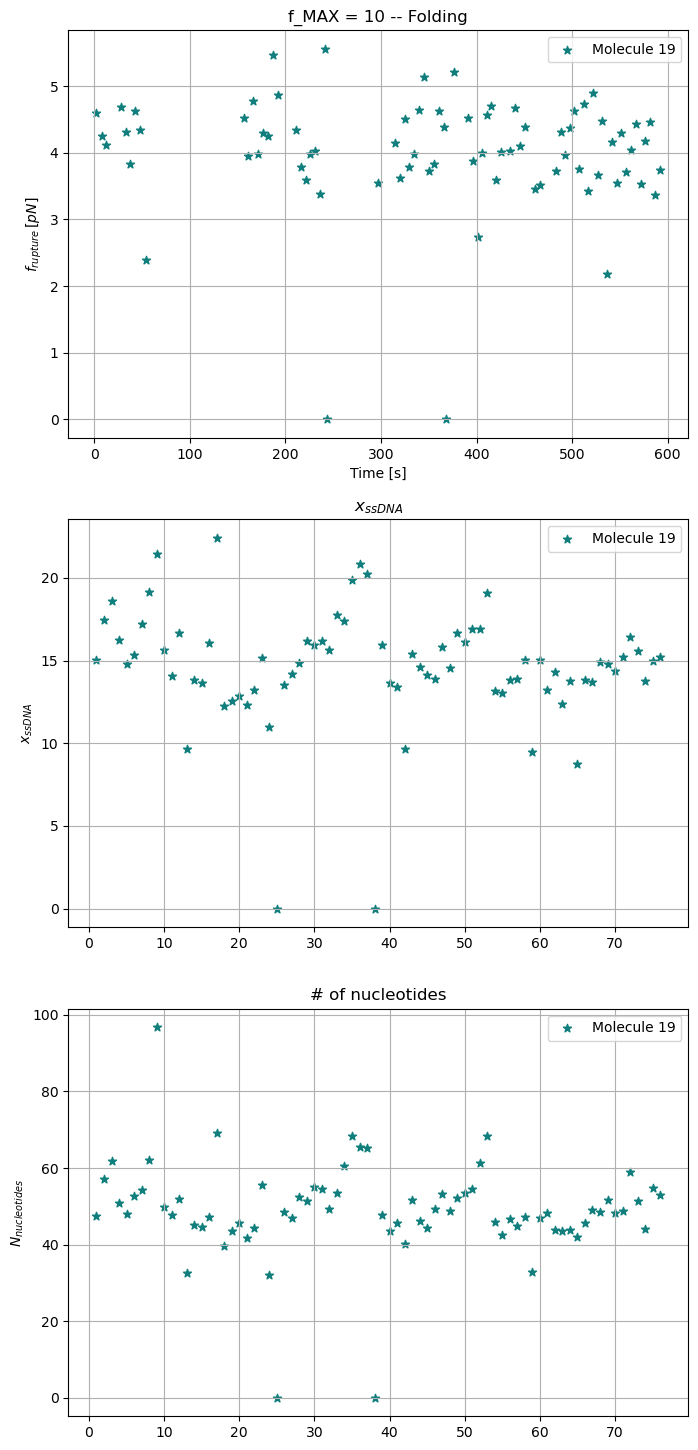

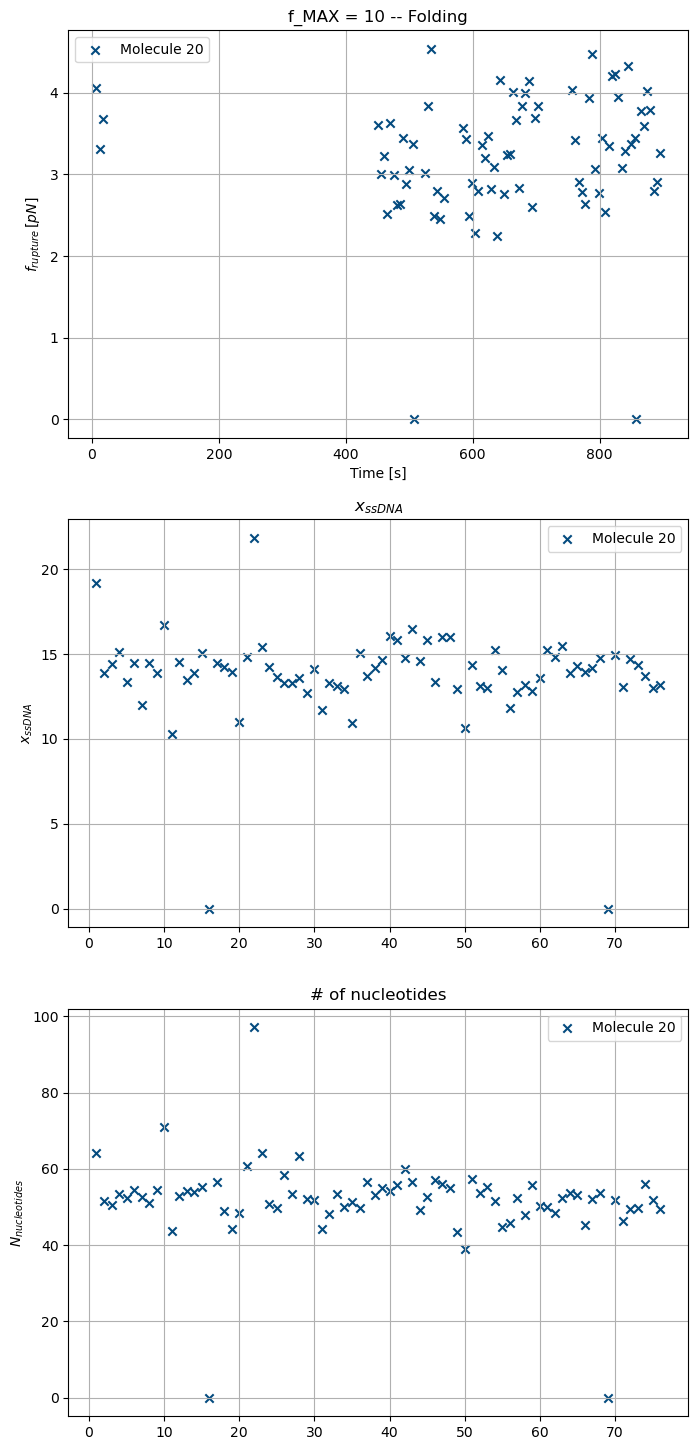

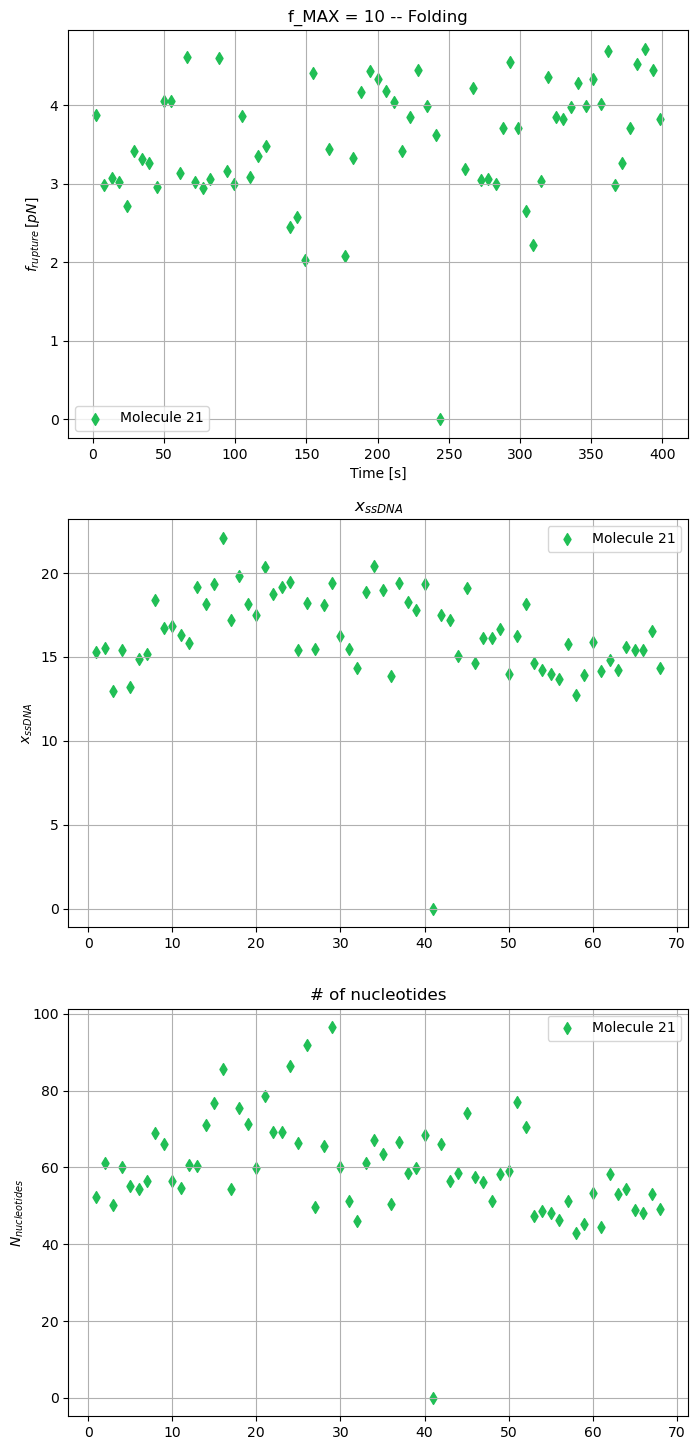

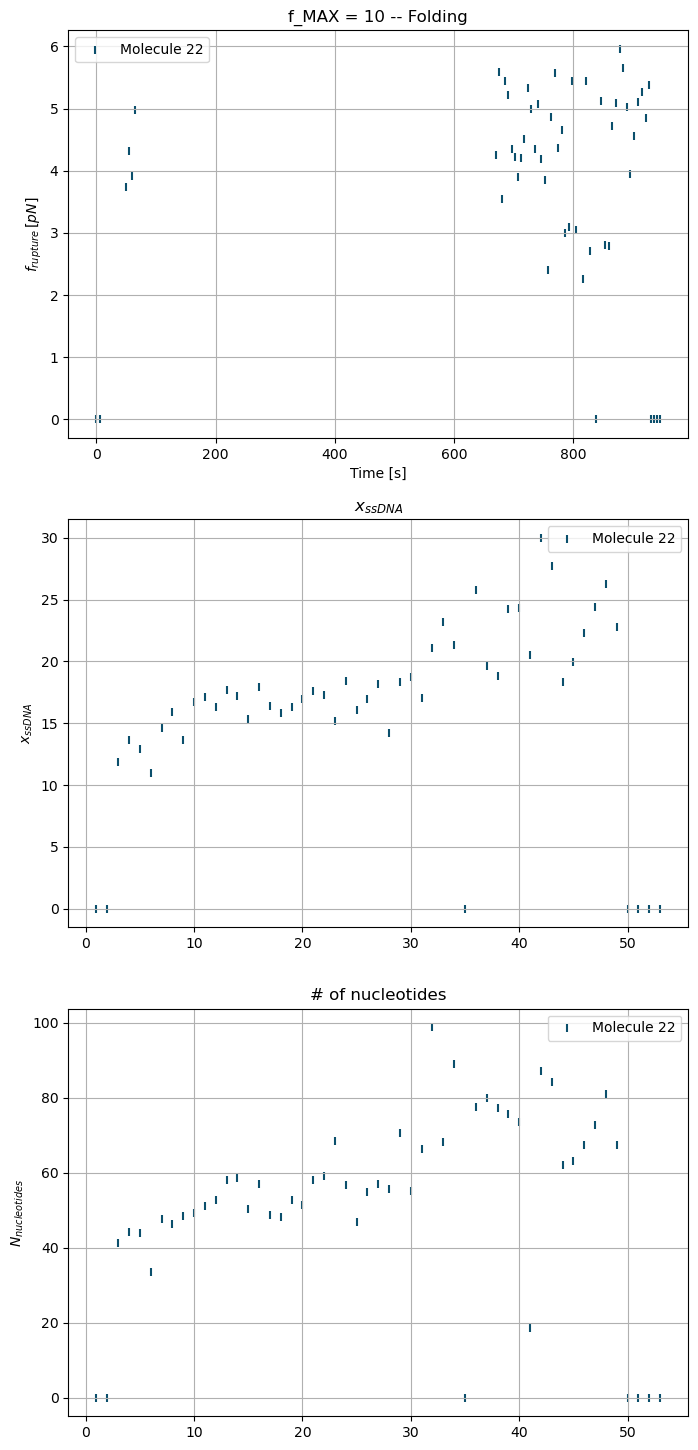

In [33]:
for m in range(len(molecules)):
    fig, ax = plt.subplots(3, figsize=(8, 18))
    col = colors[m]
    g = 0
    for i in range(len(all_molecules_f[m])):
        g += 1 
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_f[m][i][0]
        ax[0].scatter(t_0, f, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)
    ax[0].grid()
    ax[0].legend(loc='best')
    ax[0].set_title(f'f_MAX = {f_max} -- Folding')
    ax[0].set_xlabel('Time [s]')
    ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

    ax[1].grid()
    ax[1].legend()
    ax[1].set_title('$x_{ssDNA}$')
    ax[1].set_ylabel('$x_{ssDNA}$')

    ax[2].grid()
    ax[2].legend()
    ax[2].set_title('# of nucleotides')
    ax[2].set_ylabel('$N_{nucleotides}$')
    plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Folding_Molecule{molecules[m]}.png', dpi=300, bbox_inches='tight')
    plt.show()

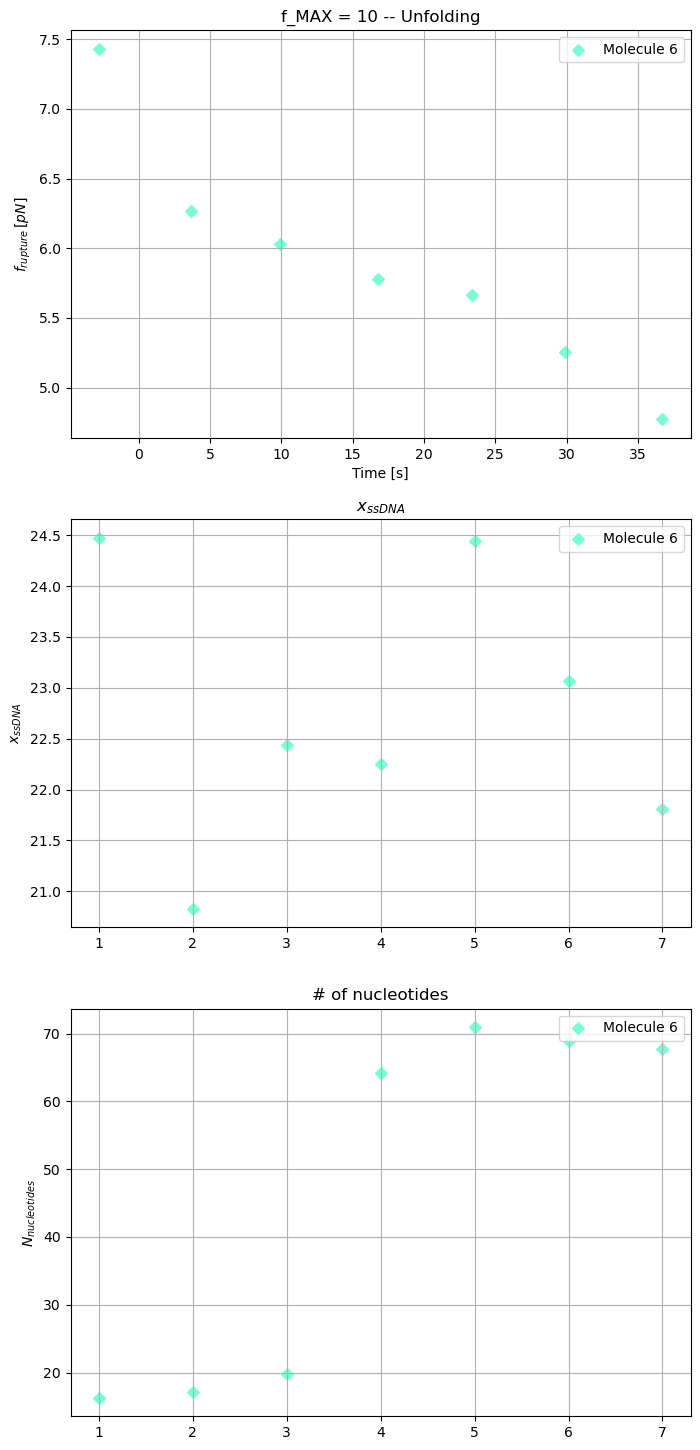

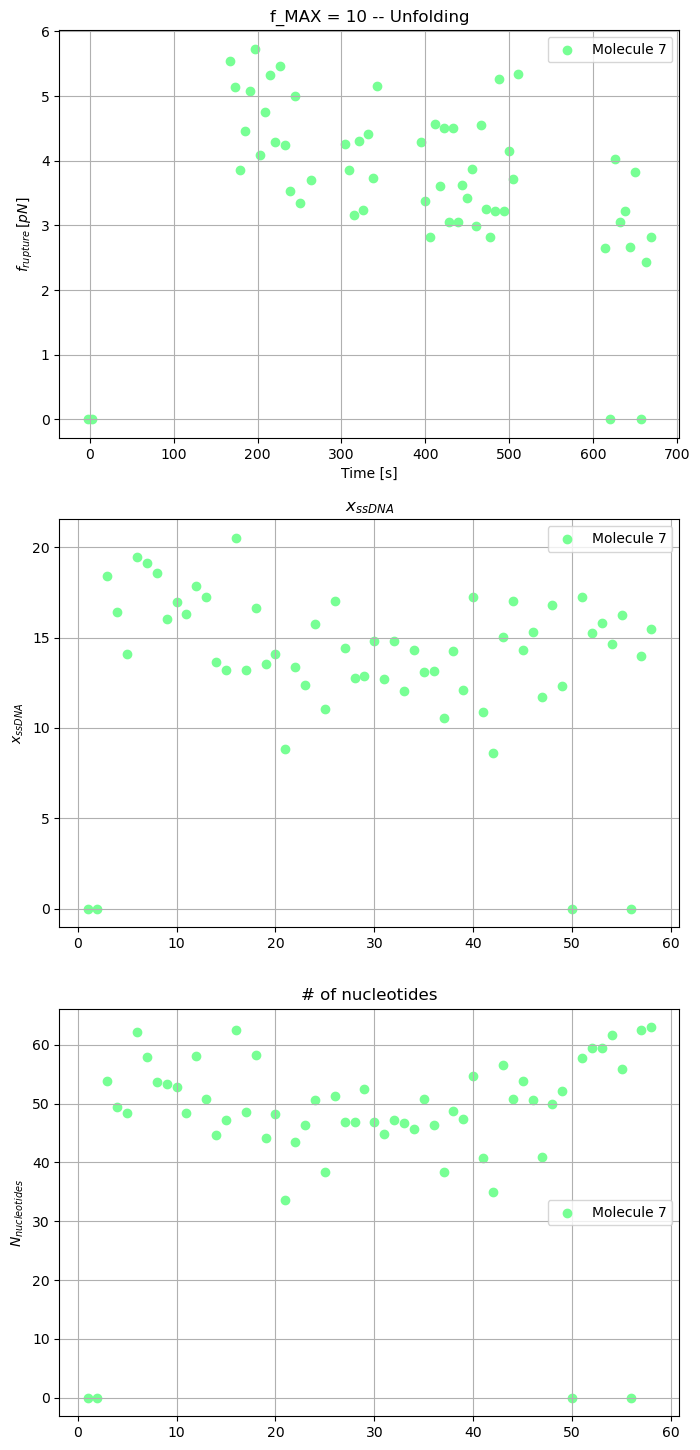

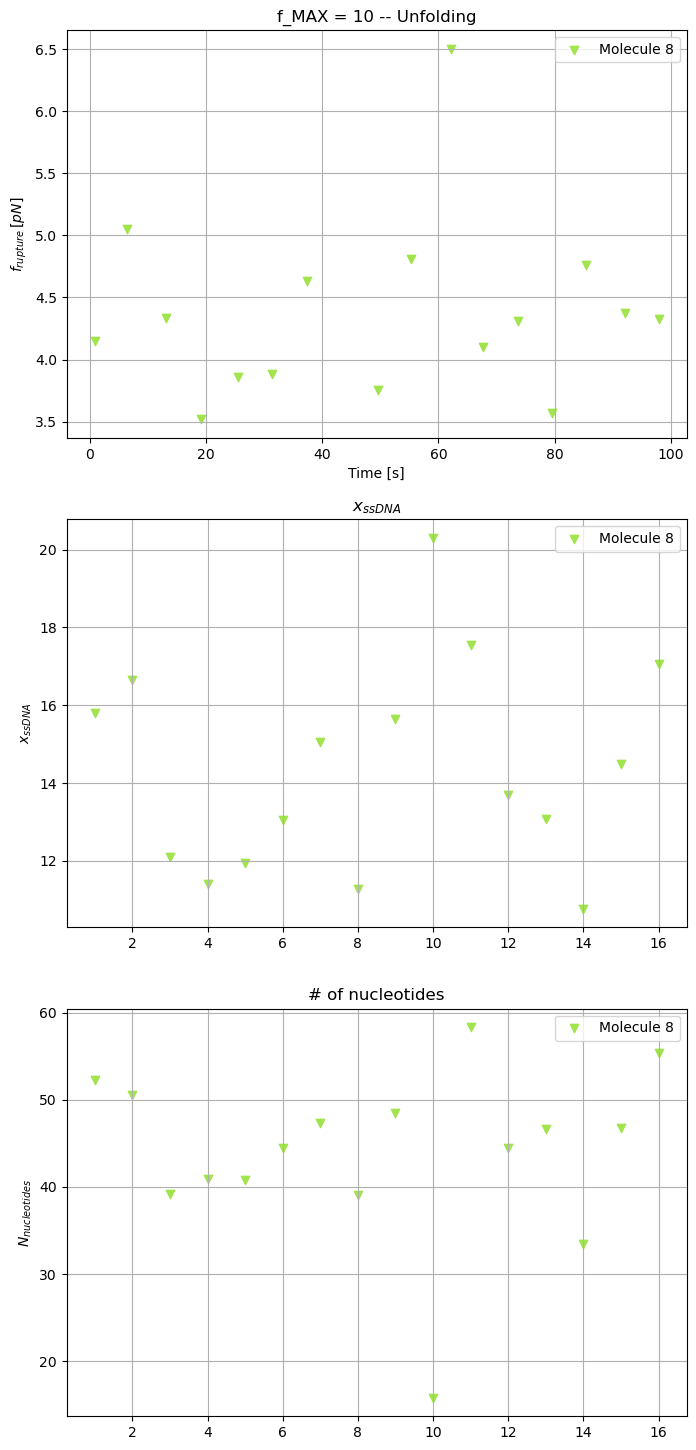

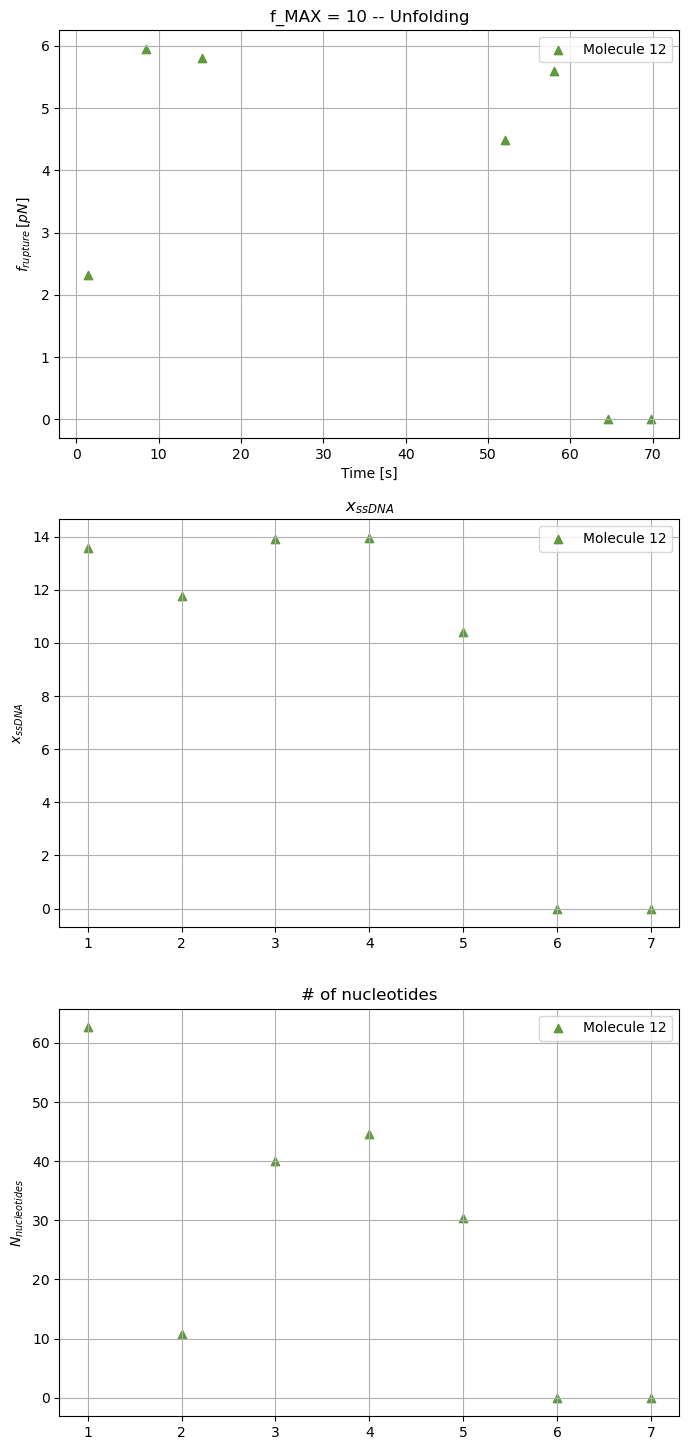

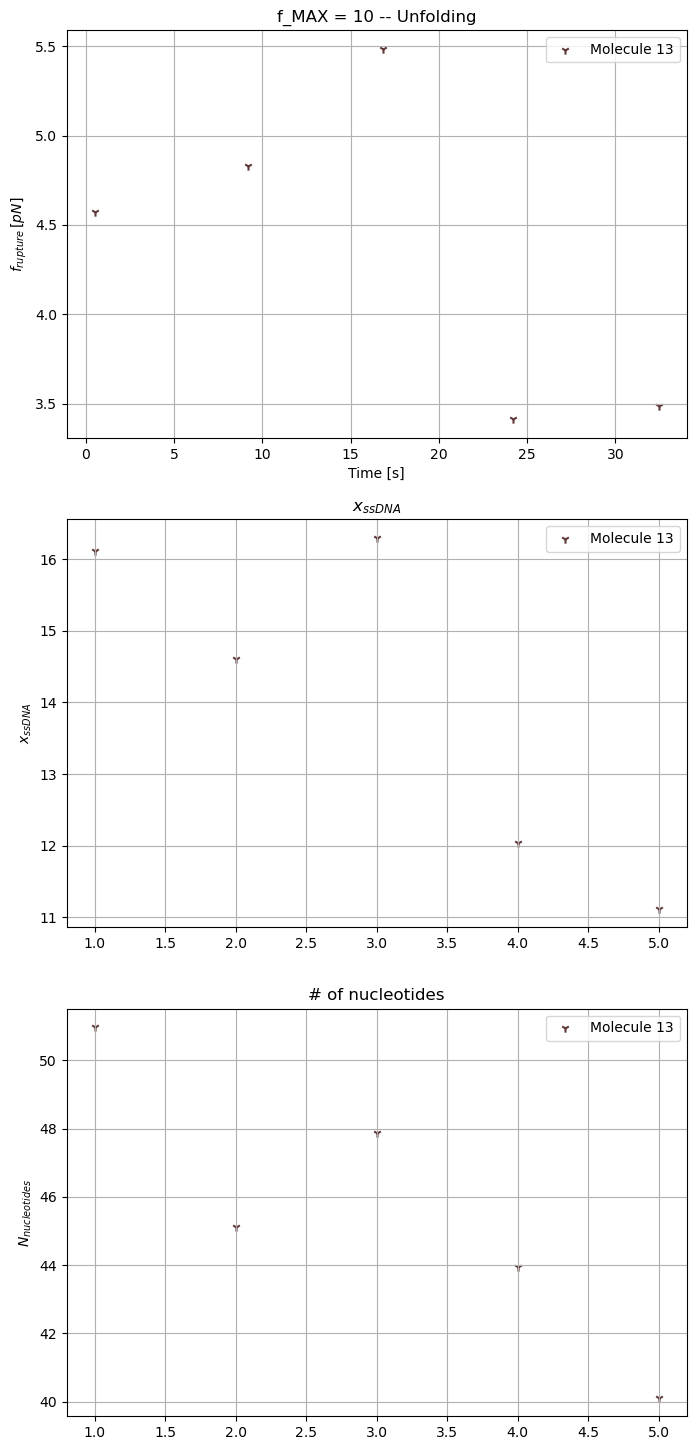

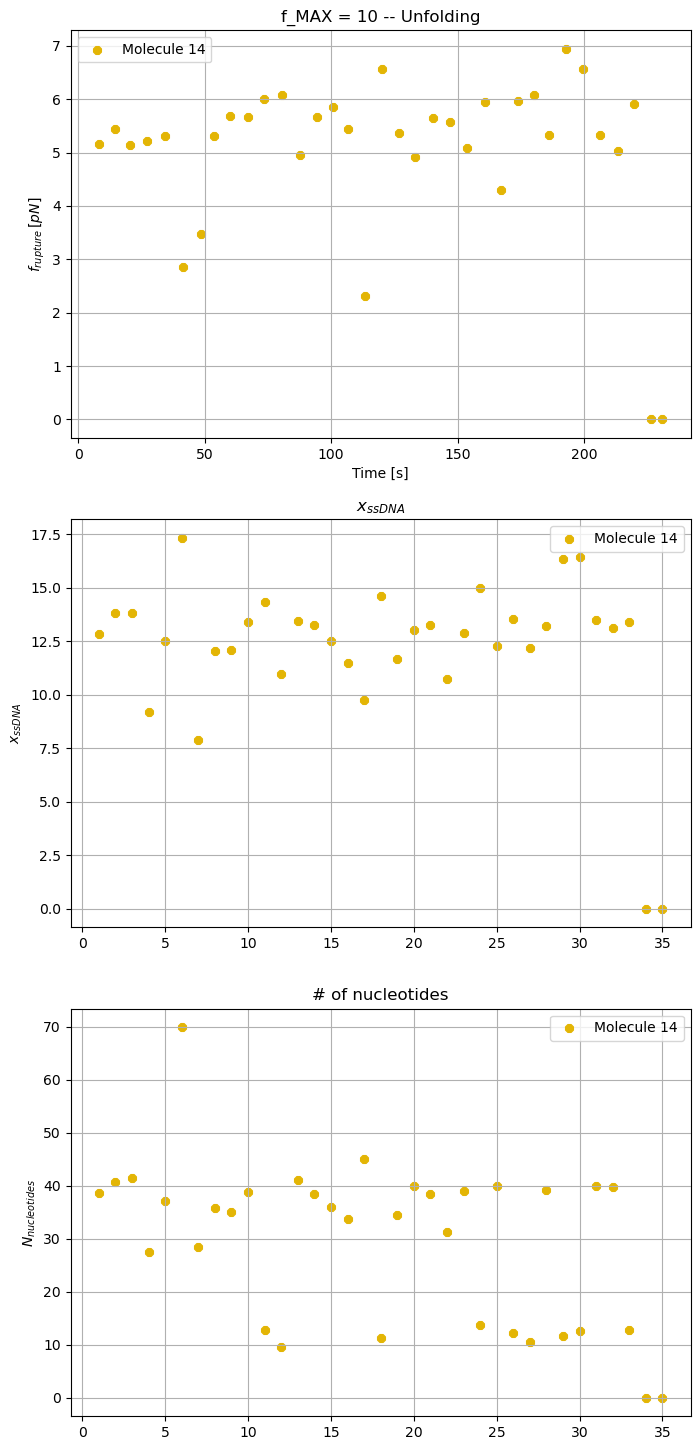

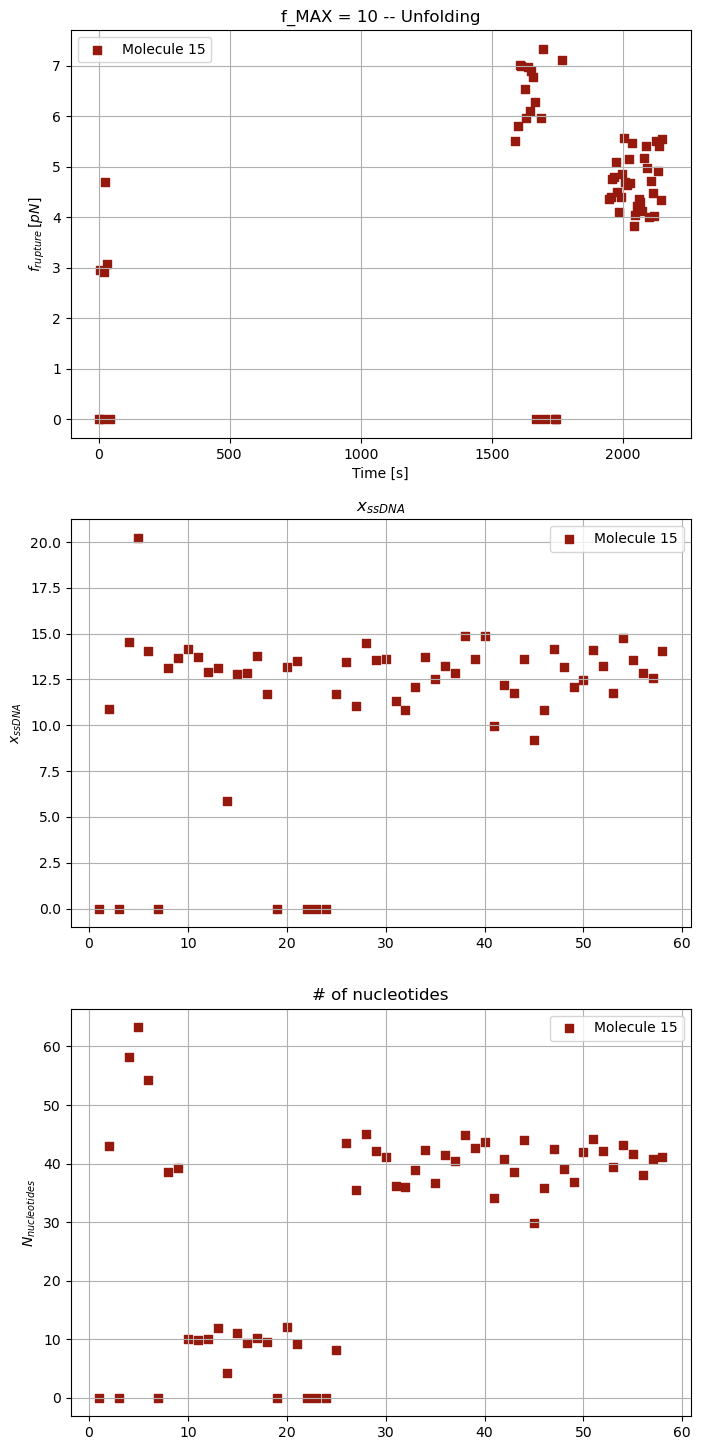

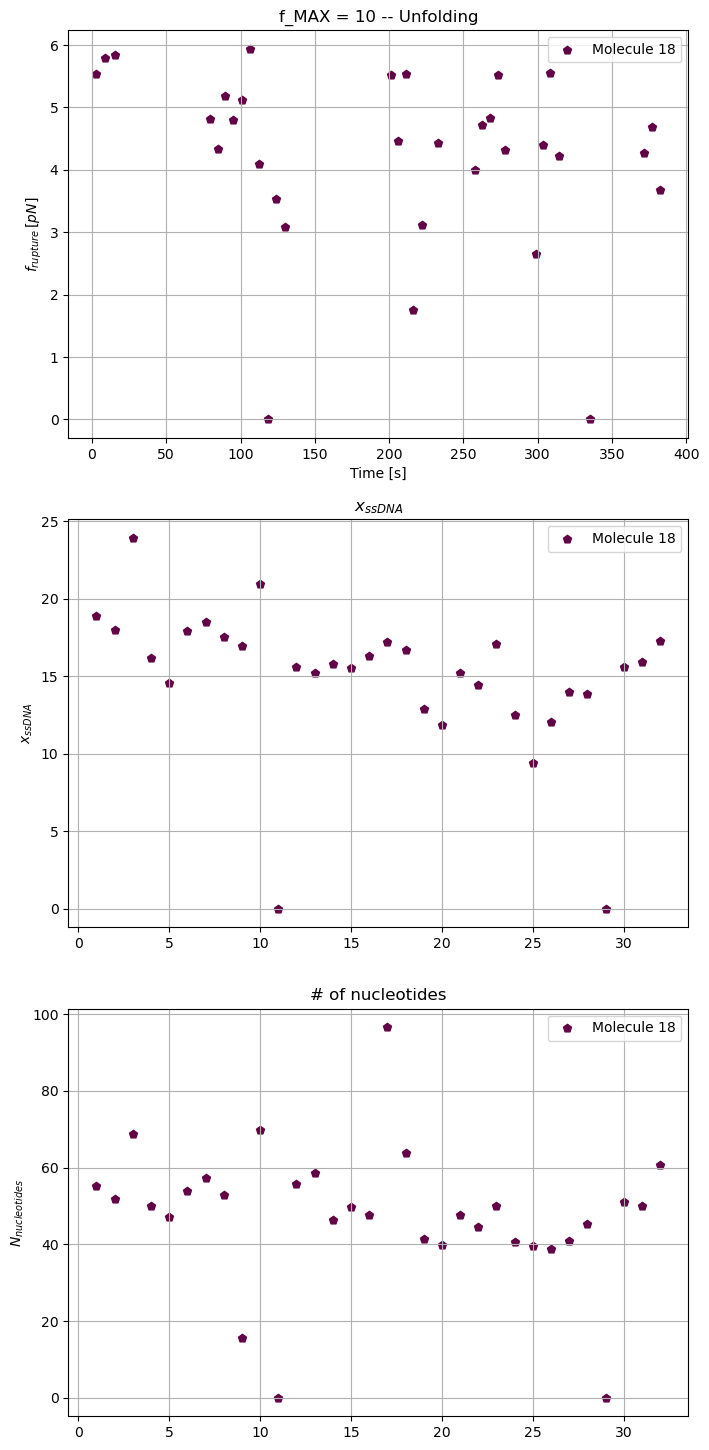

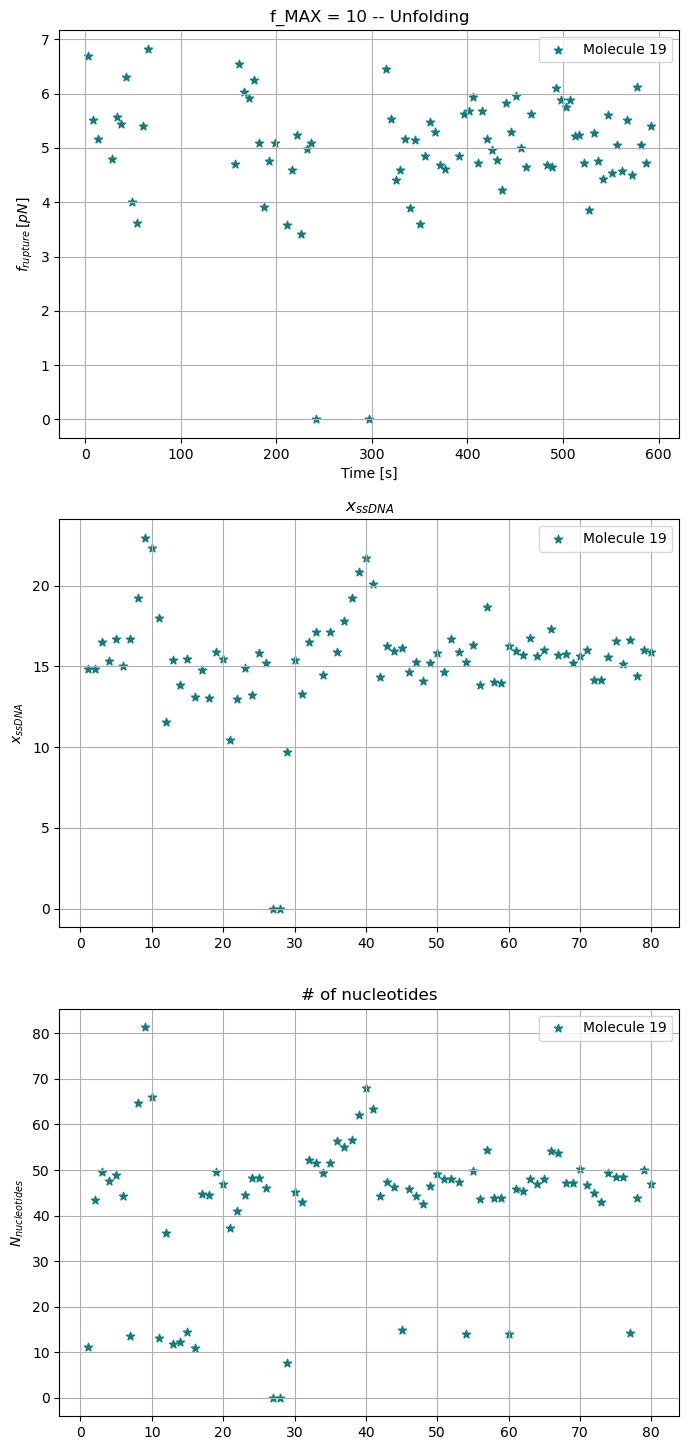

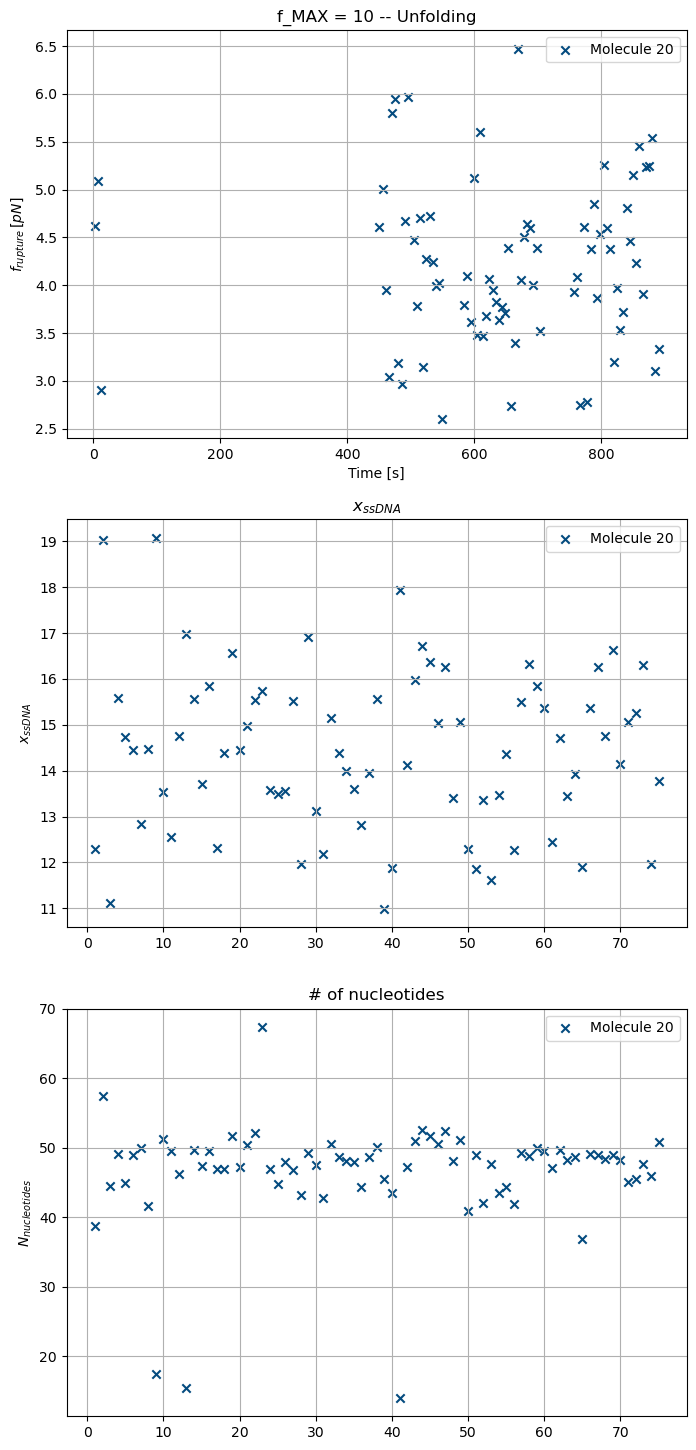

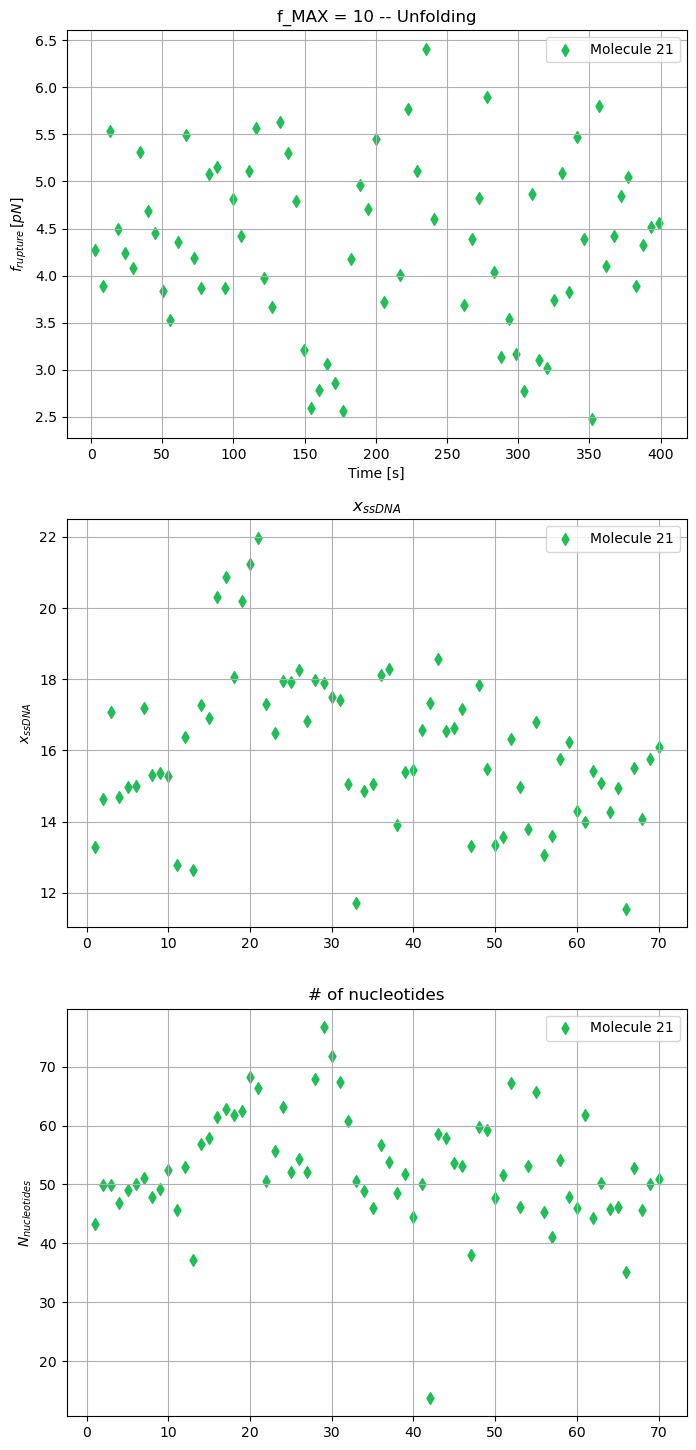

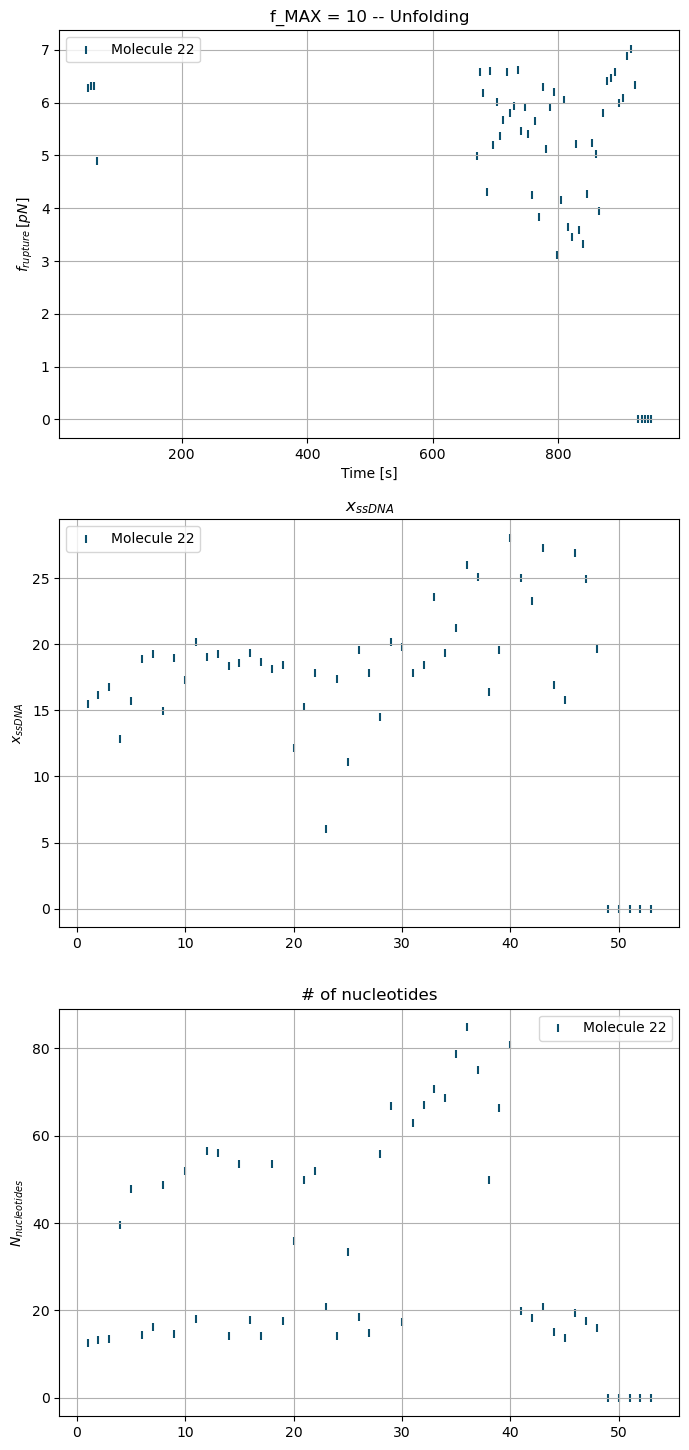

In [34]:
for m in range(len(molecules)):
    fig, ax = plt.subplots(3, figsize=(8, 18))
    col = colors[m]
    g = 0
    for i in range(len(all_molecules_u[m])):
        g += 1 
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_u[m][i][0]
        ax[0].scatter(t_0, f, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)
    ax[0].grid()
    ax[0].legend(loc='best')
    ax[0].set_title(f'f_MAX = {f_max} -- Unfolding')
    ax[0].set_xlabel('Time [s]')
    ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

    ax[1].grid()
    ax[1].legend()
    ax[1].set_title('$x_{ssDNA}$')
    ax[1].set_ylabel('$x_{ssDNA}$')

    ax[2].grid()
    ax[2].legend()
    ax[2].set_title('# of nucleotides')
    ax[2].set_ylabel('$N_{nucleotides}$')
    plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Unfolding_Molecule{molecules[m]}.png', dpi=300, bbox_inches='tight')
    plt.show()